<a href="https://colab.research.google.com/github/Dahernandezsilve/HT1MD/blob/main/HT_1_An%C3%A1lisis_Exploratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Universidad del Valle de Guatemala
18 Avenida 11-95 Guatemala      
Departamento de Computación     
Facultad de Ingeniería       
Minería de Datos Sección 10         
Fecha de entrega: 29/01/2024        

Grupo 6 | Integrantes:
- Diego Alexander Hernández Silvestre 21270
- Linda Inés Jimenez Vides 21169
- Daniel Armando Valdez Reyes 21240

## HDT8 - RNA
Para realizar una exploración inicial del conjunto de datos, se prodeció a realizar un resumen de la información proporcionada en el dataset del archivo "*train.csv*. A continuación se muestran los resultados: 

*Primero se importan todas la librerías requeridas para llevar a cabo el análisis*

In [1]:
import pandas as pd
from scipy.stats import shapiro, ks_2samp, anderson
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import *
import matplotlib.pyplot as plt
from sklearn import datasets
import sklearn as sklearn
import sklearn.cluster as cluster
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
import skfuzzy as fuzz
import pylab
import sklearn.mixture as mixture
import pyclustertend 
import random
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import Ridge
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from yellowbrick.regressor import ResidualsPlot
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
from scipy.stats import normaltest

from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import root_mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import random
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

from sklearn.compose import make_column_selector as selector #Para seleccionar de forma automática las variables numéricas y categóricas
from sklearn.preprocessing import OneHotEncoder #Para codificar las variables categóricas usando dummies
from sklearn.preprocessing import StandardScaler #Para normalizar las variables numéricas
from sklearn.compose import ColumnTransformer #Modifica las columnas usando los preprocesadores
from sklearn.pipeline import make_pipeline #Planifica una secuencia de procesos
from sklearn import set_config #Para mostrar graficamente el pipeline
from sklearn.model_selection import GridSearchCV

set_config(display='diagram')
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

C:\Users\danar\AppData\Local\Temp\ipykernel_16232\4188660121.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Se lleva a cabo un análisis identificando los tipos de variables involucradas:
## Descripcion de variables
- MSSubClass: Cuantitativa Discreta
- MSZoning: Cualitativa Categorica	
- LotFrontage: Cuantitativa Medible
- LotArea: Cuantitativa Medible
- Street: Cualitativa Categorica
- Alley: Cualitativa Categorica
- LotShape: Cualitativa Categorica       
- LandContour: Cualitativa Categorica
- Utilities: Cualitativa Categorica		
- LotConfig: Cualitativa Categorica
- LandSlope: Cualitativa Categorica 
- Neighborhood: Cualitativa Categorica
- Condition1: Cualitativa Categorica
- Condition2: Cualitativa Categorica
- BldgType: Cualitativa Categorica
- HouseStyle: Cualitativa Categorica 
- OverallQual: Cuantitativa Discreta
- OverallCond: Cuantitativa Discreta
- YearBuilt: Cuantitativa Discreta
- YearRemodAdd: Cuantitativa Discreta
- RoofStyle: Cualitativa Categorica
- RoofMatl: Cualitativa Categorica
- Exterior1st: Cualitativa Categorica
- Exterior2nd: Cualitativa Categorica
- MasVnrType: Cualitativa Categorica
- MasVnrArea: Cuantitativa Continua
- ExterQual: Cualitativa Categorica 
- ExterCond: Cualitativa Categorica
- Foundation: Cualitativa Categorica
- BsmtQual: Cualitativa Ordinal
- BsmtCond: Cualitativa Categorica
- BsmtExposure: Cualitativa Categorica 
- BsmtFinType1: Cualitativa Categorica
- BsmtFinSF1: Cuantitativa Continua
- BsmtFinType2: Cualitativa Categorica
- BsmtFinSF2: Cuantitativa Continua
- BsmtUnfSF: Cuantitativa Continua
- TotalBsmtSF: Cuantitativa Continua
- Heating: Cualitativa Categorica
- HeatingQC: Cualitativa Categoriica
- CentralAir: Cualitativa Categorica
- Electrical: Cualitativa Categorica
- 1stFlrSF: Cuantitativa Continua
- 2ndFlrSF: Cuantitativa Continua
- LowQualFinSF: Cuantitativa Continua
- GrLivArea: Cuantitativa Continua
- BsmtFullBath: Cuantitativa Discreta
- BsmtHalfBath: Cuantitativa Discreta
- FullBath: Cuantitativa Discreta
- HalfBath: Cuantitativa Discreta
- Bedroom: Cuantitativa Discreta
- Kitchen: Kitchens above grade
- KitchenQual: Cualitativa Categorica
- TotRmsAbvGrd: Cuantitativa Discreta
- Functional: Cualitativa Categorica
- Fireplaces: Cuantitativa Discreta
- FireplaceQu: Cualitativa Categorica
- GarageType: Cualitativa Categorica		
- GarageYrBlt: Cuantitativa Discreta
- GarageFinish: Cualitativa Categorica
- GarageCars: Cuantitativa Discreta
- GarageArea: Cuantitativa Continua
- GarageQual: Cualitativa Categorica
- GarageCond: Cualitativa Categorica 
- PavedDrive: Cualitativa Categorica
- WoodDeckSF: Cuantitativa Continua
- OpenPorchSF: Cuantitativa Continua
- EnclosedPorch: Cuantitativa Continua
- 3SsnPorch: TCuantitativa Continua
- ScreenPorch: Cuantitativa Continua
- PoolArea: Cuantitativa Continua
- PoolQC: Cualitativa Categorica
- Fence: Cualitativa Categorica
- MiscFeature: Cualitativa Categorica
- MiscVal: Cuantitativa Discreta
- MoSold: Cuantitativa Discreta
- YrSold: Cuantitativa Discreta
- SaleType: Cualitativa Categorica
- SaleCondition: Cualitativa Categorica

*Antes de llevar a cabo el análisis se realiza una carga de los datos y se realizá una serie de preprocesamientos para que la información sea útil para el análisis como llenar con 0s o realizar las conversiones debidas a elementos tipo *NaN***

In [2]:
dataframe: pd.DataFrame = pd.read_csv("train.csv",  encoding='ISO-8859-1')

dataframe.columns
dataframe['PoolQC'] = dataframe['PoolQC'].fillna(0) # Se rellenan con 0 los na de PoolQC
dataframe['MasVnrType'] = dataframe['MasVnrType'].fillna('None') # Se rellenan con 'None' los na 'MasVnrType'
dataframe['FireplaceQu'] = dataframe['MasVnrType'].fillna('NA')
dataframe['Fence'] = dataframe['Fence'].fillna('NA')
dataframe['MiscFeature'] = dataframe['MiscFeature'].fillna('NA')
dataframe['LotFrontage'] = dataframe['LotFrontage'].fillna(0)
dataframe['Alley'] = dataframe['Alley'].fillna('NA')
#dataframe['GarageYrBlt'] = dataframe['GarageYrBlt'].fillna(dataframe['GarageYrBlt'].mean())
#dataframe['MasVnrArea'] = dataframe['MasVnrArea'].fillna(dataframe['MasVnrArea'].mean())

dataframe.drop(['Id'], axis=1, inplace=True) #Se elimina la columna Id

infoSumary = dataframe.info() #Mostrar información del tipo de variables utilizadas

#Extraccion de las columnas a utilizar para las pruebas de clustering y regresion lineal
df = dataframe
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,0,NA,NA,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,...,0,0,NA,NA,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,0,NA,NA,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,0,NA,NA,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,...,0,0,NA,NA,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,0,NA,NA,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,0,MnPrv,NA,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,0,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,0,NA,NA,0,4,2010,WD,Normal,142125


Dentro del preprocesamiento de datos se convirtieron algunas variables cualitativas a su versión cuantitativas que se consideraron que pueden ser útiles para el análisis exploratorio.

In [3]:
new_columns = []
def change(variable):
    global df, new_columns
    count = 1
    new_columns.append(variable)
        
    if not pd.api.types.is_numeric_dtype(dataframe[variable]):
        dictValue = set(df[variable].unique())

        for i in dictValue:
            df[variable+'_'+str(i)]=dataframe[variable].apply(lambda x: 1 if x == i else 0)
            new_columns.append(variable+'_'+str(i))
        
        new_columns.remove(variable)

        
        dataframe.drop([variable], axis=1, inplace=True)
    

variables = [
    'MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
    'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
    'OverallCond', 'YearBuilt', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
    'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'TotalBsmtSF', 'Heating',
    'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
    'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'BsmtCond', 'BsmtFinType2', 'RoofMatl',
    'ExterQual', 'SaleCondition'
]

for variable in variables:
    change(variable=variable)

df.columns

C:\Users\danar\AppData\Local\Temp\ipykernel_16232\282877624.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[variable+'_'+str(i)]=dataframe[variable].apply(lambda x: 1 if x == i else 0)
C:\Users\danar\AppData\Local\Temp\ipykernel_16232\282877624.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[variable+'_'+str(i)]=dataframe[variable].apply(lambda x: 1 if x == i else 0)
C:\Users\danar\AppData\Local\Temp\ipykernel_16232\282877624.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result o

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'ExterQual_TA', 'ExterQual_Ex', 'ExterQual_Gd', 'ExterQual_Fa',
       'SaleCondition_Alloca', 'SaleCondition_Abnorml',
       'SaleCondition_Partial', 'SaleCondition_AdjLand',
       'SaleCondition_Family', 'SaleCondition_Normal'],
      dtype='object', length=302)

In [4]:
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ExterQual_TA,ExterQual_Ex,ExterQual_Gd,ExterQual_Fa,SaleCondition_Alloca,SaleCondition_Abnorml,SaleCondition_Partial,SaleCondition_AdjLand,SaleCondition_Family,SaleCondition_Normal
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,1,0,0,0,0,0,0,1
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,1,0,0,0,0,0,0,0,0,1
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,1,0,0,0,0,0,0,1
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,1,0,0,0,0,1,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,1,0,0,0,0,0,0,1


In [5]:
print('Se determina que el tamaño del dataframe con el que se está trabajando es de',len(dataframe),'datos (filas) incluyendo los encabezados de la tabla.')

Se determina que el tamaño del dataframe con el que se está trabajando es de 1460 datos (filas) incluyendo los encabezados de la tabla.


En este estudio, se decidió como convención realizar transformaciones de datos únicamente a aquellas columnas que cuentan con una cantidad de valores *NaN* mayor a 50 y son cuantitativas. Con este margen, únicamente dos columnas no fueron transformadas:

In [6]:
# Extrae la información relevante del resumen
info_data = {'Columna': [], 'Non-Null Count': [], 'Dtype': []}

for col in dataframe.columns:
    info_data['Columna'].append(col)
    info_data['Non-Null Count'].append(dataframe[col].count())
    info_data['Dtype'].append(dataframe[col].dtype)

# Crea un nuevo DataFrame a partir de la información extraída
info_df = pd.DataFrame(info_data)

info_df[info_df['Non-Null Count']<1460]

,Columna,Non-Null Count,Dtype
7,MasVnrArea,1452,float64
24,GarageYrBlt,1379,float64


Se retiran las filas que contengan *NaN* en la columna de respuesta **SalePrice** debido a que es la variable principal que se está estudiando.

In [7]:
dataframe['SalePrice'] =dataframe['SalePrice'].dropna()
dataframe['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

# La variable respuesta es SalePrice, que  representa el precio de venta. 
    Como es una variable numerica, hay que hacerla categorica. 
    Luego evaluamos que tan balanceados estan los datos con respecto a esta

In [8]:
limite_inferior = df['SalePrice'].quantile(0.25)
limite_intermedio = df['SalePrice'].quantile(0.50)

In [9]:
def asignar_categoria(precio):
    if precio <= limite_inferior:
        return 'Económica'
    elif precio <= limite_intermedio:
        return 'Intermedia'
    else:
        return 'Cara'
    
df['categoria_precio'] = df['SalePrice'].apply(asignar_categoria)
toRegresion = df.pop('SalePrice')
df.head()

C:\Users\danar\AppData\Local\Temp\ipykernel_16232\210225139.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['categoria_precio'] = df['SalePrice'].apply(asignar_categoria)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ExterQual_Ex,ExterQual_Gd,ExterQual_Fa,SaleCondition_Alloca,SaleCondition_Abnorml,SaleCondition_Partial,SaleCondition_AdjLand,SaleCondition_Family,SaleCondition_Normal,categoria_precio
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,1,0,0,0,0,0,0,1,Cara
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,0,0,0,0,1,Cara
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,1,0,0,0,0,0,0,1,Cara
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,Intermedia
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,1,0,0,0,0,0,0,1,Cara


In [10]:
df.dropna()
df.groupby('categoria_precio').size()

categoria_precio
Cara          728
Económica     365
Intermedia    367
dtype: int64

## Algoritmo de Clasificación   
Vamos a dividir en conjuntos de entrenamiento (70%) y prueba (30%) los datos

In [12]:
target = df.pop('categoria_precio')
data = df

In [13]:
random.seed(123)
data_train, data_test,target_train, target_test = train_test_split(data, target,test_size=0.3,train_size=0.7)
data_train.columns
data_train = data_train.dropna()
target_train = target_train[data_train.index]  # Asegúrate de alinear los objetivos después de eliminar las filas
data_test = data_test.dropna()
target_test = target_test[data_test.index]  # Asegúrate de alinear los objetivos después de eliminar las filas


In [16]:
# usar funcion logistic
mlp = MLPClassifier(hidden_layer_sizes=(3,4), max_iter=1000, activation="identity")
mlp.fit(data_train,target_train)
y_pred = mlp.predict(data_test)
y_pred

array(['Económica', 'Cara', 'Económica', 'Cara', 'Intermedia', 'Cara',
       'Intermedia', 'Cara', 'Intermedia', 'Intermedia', 'Cara', 'Cara',
       'Cara', 'Cara', 'Cara', 'Intermedia', 'Intermedia', 'Económica',
       'Cara', 'Intermedia', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara',
       'Cara', 'Económica', 'Económica', 'Cara', 'Cara', 'Cara', 'Cara',
       'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Intermedia', 'Económica',
       'Cara', 'Intermedia', 'Cara', 'Cara', 'Intermedia', 'Cara', 'Cara',
       'Económica', 'Cara', 'Cara', 'Intermedia', 'Cara', 'Cara', 'Cara',
       'Cara', 'Cara', 'Cara', 'Intermedia', 'Cara', 'Cara', 'Económica',
       'Económica', 'Cara', 'Económica', 'Cara', 'Cara', 'Cara',
       'Económica', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Económica',
       'Económica', 'Cara', 'Económica', 'Económica', 'Cara', 'Económica',
       'Económica', 'Intermedia', 'Intermedia', 'Económica', 'Intermedia',
       'Cara', 'Intermedia', 'Intermedia', 'Económica', '

In [17]:
cm = confusion_matrix(target_test,y_pred)
accuracy = accuracy_score(target_test,y_pred)
precision = precision_score(target_test, y_pred,average='micro')
recall =  recall_score(target_test, y_pred,average='micro')
f1 = f1_score(target_test,y_pred,average='micro')
print('Matriz de confusión\n',cm)
print('Accuracy: ',accuracy)
print('Precision: ', precision)
print('recall: ',recall)

Matriz de confusión
 [[195   2   7]
 [  5  62  22]
 [ 42  25  45]]
Accuracy:  0.745679012345679
Precision:  0.745679012345679
recall:  0.745679012345679


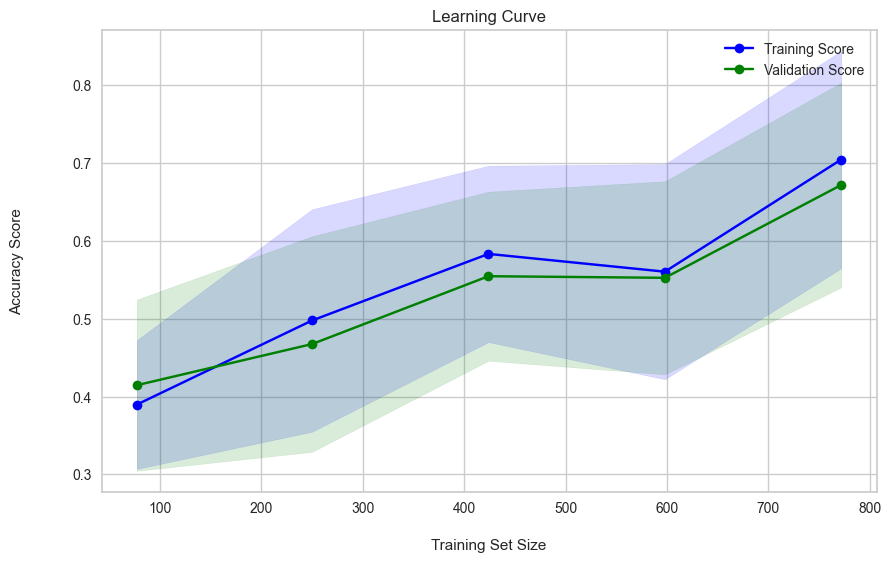

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(mlp,
                                                        data_train,
                                                        target_train,
                                                        cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation Score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.title('Learning Curve')

# Ajustar la posición de las etiquetas de las funciones de la gráfica
plt.gca().xaxis.set_label_coords(0.5, -0.1)  # Ajustar la posición de la etiqueta del eje x
plt.gca().yaxis.set_label_coords(-0.1, 0.5)  # Ajustar la posición de la etiqueta del eje y
plt.gca().title.set_position([.5, 1.05])  # Ajustar la posición del título

plt.show()

In [37]:
mlp2 = MLPClassifier(hidden_layer_sizes=(5,2), activation='relu', max_iter=2000)
mlp2.fit(data_train,target_train)
y_pred2 = mlp2.predict(data_test)
X_pred2 = mlp2.predict(data_train)
y_pred2

array(['Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara',
       'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara',
       'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara',
       'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara',
       'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara',
       'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara',
       'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara',
       'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara',
       'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara',
       'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara',
       'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara',
       'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara',
       'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara',
       'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara',
      

In [38]:
cm2 = confusion_matrix(target_test,y_pred2)
accuracy2 = accuracy_score(target_test,y_pred2)
precision2 = precision_score(target_test, y_pred2,average='micro')
recall2 =  recall_score(target_test, y_pred2,average='micro')
f12 = f1_score(target_test,y_pred2,average='micro')
print('Matriz de confusión\n',cm2)
print('Accuracy: ',accuracy2)
print('Precision: ', precision2)
print('recall: ',recall2)

Matriz de confusión
 [[216   0   0]
 [ 86   0   0]
 [113   0   0]]
Accuracy:  0.5204819277108433
Precision:  0.5204819277108433
recall:  0.5204819277108433


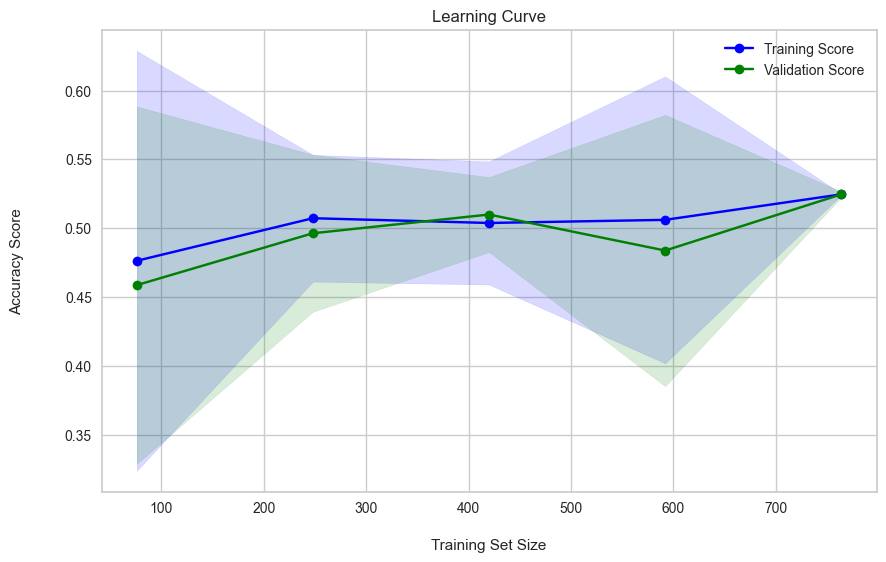

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(mlp2,
                                                        data_train,
                                                        target_train,
                                                        cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation Score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.title('Learning Curve')

# Ajustar la posición de las etiquetas de las funciones de la gráfica
plt.gca().xaxis.set_label_coords(0.5, -0.1)  # Ajustar la posición de la etiqueta del eje x
plt.gca().yaxis.set_label_coords(-0.1, 0.5)  # Ajustar la posición de la etiqueta del eje y
plt.gca().title.set_position([.5, 1.05])  # Ajustar la posición del título

plt.show()

In [40]:
cm2 = confusion_matrix(target_train,X_pred2)
accuracy2 = accuracy_score(target_train,X_pred2)
precision2 = precision_score(target_train, X_pred2,average='micro')
recall2 =  recall_score(target_train, X_pred2,average='micro')
f12 = f1_score(target_train,X_pred2,average='micro')
print('Matriz de confusión\n',cm2)
print('Accuracy: ',accuracy2)
print('Precision: ', precision2)
print('recall: ',recall2)

Matriz de confusión
 [[501   0   0]
 [213   0   0]
 [241   0   0]]
Accuracy:  0.5246073298429319
Precision:  0.5246073298429319
recall:  0.5246073298429319


In [20]:
preprocesador_categorico = OneHotEncoder(handle_unknown="ignore")
preprocesador_numerico = StandardScaler()

In [21]:
#Creamos los selectores
selector_numericas = selector(dtype_exclude=object) #Seleccionamos todas las variables que no son Object
selector_categoricas = selector(dtype_include=object) #Seleccionamos todas las varibles de tipo object
#Seleccionamos las columnas que cumplen con los selectores pasándole los datos
numericas = selector_numericas(data)
categoricas = selector_categoricas(data)
#veamos que tan bien separó las variables
print("Numéricas: ",numericas)
print("Categóricas: ", categoricas)

Numéricas:  ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RM', 'Street_Pave', 'Street_Grvl', 'Alley_NA', 'Alley_Pave', 'Alley_Grvl', 'LotShape_IR3', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_Reg', 'LandContour_Bnk', 'LandContour_Lvl', 'LandContour_HLS', 'LandContour_Low', 'Utilities_AllPub', 'Utilities_NoSeWa', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_Inside', 'LandSlope_Mod', 'LandSlope_Gtl', 'LandSlope_Sev', 'Neighborho

In [22]:
preprocesador = ColumnTransformer([
    ('one_hot_encoder',preprocesador_categorico,categoricas),
    ('standard_scaler',preprocesador_numerico, numericas)
])

## Modelo 1 RNA

In [23]:
mlpT = make_pipeline(preprocesador,MLPClassifier(activation="identity",verbose=True,hidden_layer_sizes=(5,3)))
mlpT

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  []),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', ...])])),
                ('mlpclassifier',
                 MLPClassifier(activation='identity', hidden_layer_sizes=(5, 3),
                               verbose=True))])

In [24]:
mlpT.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'columntransformer', 'mlpclassifier', 'columntransformer__n_jobs', 'columntransformer__remainder', 'columntransformer__sparse_threshold', 'columntransformer__transformer_weights', 'columntransformer__transformers', 'columntransformer__verbose', 'columntransformer__verbose_feature_names_out', 'columntransformer__one_hot_encoder', 'columntransformer__standard_scaler', 'columntransformer__one_hot_encoder__categories', 'columntransformer__one_hot_encoder__drop', 'columntransformer__one_hot_encoder__dtype', 'columntransformer__one_hot_encoder__feature_name_combiner', 'columntransformer__one_hot_encoder__handle_unknown', 'columntransformer__one_hot_encoder__max_categories', 'columntransformer__one_hot_encoder__min_frequency', 'columntransformer__one_hot_encoder__sparse_output', 'columntransformer__standard_scaler__copy', 'columntransformer__standard_scaler__with_mean', 'columntransformer__standard_scaler__with_std', 'mlpclassifier__activation', 'mlpcl

In [25]:
data_train, data_test, target_train, target_test = train_test_split(
    data, target, train_size=0.7,test_size=0.3)
print("Shape train",data_train.shape)
print("Shape test",data_test.shape)
data_train = data_train.dropna()
target_train = target_train[data_train.index]  # Asegúrate de alinear los objetivos después de eliminar las filas
data_test = data_test.dropna()
target_test = target_test[data_test.index]  # Asegúrate de alinear los objetivos después de eliminar las filas
data.isnull().sum()

Shape train (1021, 301)
Shape test (438, 301)


MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
                        ..
SaleCondition_Abnorml    0
SaleCondition_Partial    0
SaleCondition_AdjLand    0
SaleCondition_Family     0
SaleCondition_Normal     0
Length: 301, dtype: int64

In [26]:
mlpT.fit(data_train,target_train)

Iteration 1, loss = 1.85334760
Iteration 2, loss = 1.66472615
Iteration 3, loss = 1.51014166
Iteration 4, loss = 1.37491246
Iteration 5, loss = 1.26065328
Iteration 6, loss = 1.16216717
Iteration 7, loss = 1.07839186
Iteration 8, loss = 1.00561559
Iteration 9, loss = 0.94401180
Iteration 10, loss = 0.89038108
Iteration 11, loss = 0.84335466
Iteration 12, loss = 0.80411316
Iteration 13, loss = 0.76752970
Iteration 14, loss = 0.73411015
Iteration 15, loss = 0.70625902
Iteration 16, loss = 0.67899063
Iteration 17, loss = 0.65553413
Iteration 18, loss = 0.63310626
Iteration 19, loss = 0.61272147
Iteration 20, loss = 0.59377333
Iteration 21, loss = 0.57590477
Iteration 22, loss = 0.55894331
Iteration 23, loss = 0.54378885
Iteration 24, loss = 0.52852565
Iteration 25, loss = 0.51482094
Iteration 26, loss = 0.50198597
Iteration 27, loss = 0.48907152
Iteration 28, loss = 0.47692491
Iteration 29, loss = 0.46592430
Iteration 30, loss = 0.45466409
Iteration 31, loss = 0.44471780
Iteration 32, los

C:\Users\danar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  []),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', ...])])),
                ('mlpclassifier',
                 MLPClassifier(activation='identity', hidden_layer_sizes=(5, 3),
                               verbose=True))])

In [27]:
ypredM = mlpT.predict(data_train)
cmT = confusion_matrix(target_train,ypredM)
accuracyT = accuracy_score(target_train,ypredM)
precisionT = precision_score(target_train, ypredM,average='micro')
recallT =  recall_score(target_train, ypredM,average='micro')
f1T = f1_score(target_train,ypredM,average='micro')
print('Matriz de confusión\n',cmT)
print('Accuracy: ',accuracyT)
print('Precision: ', precisionT)
print('recall: ',recallT)


Matriz de confusión
 [[503   0   2]
 [  0 188  11]
 [  3  12 234]]
Accuracy:  0.9706190975865687
Precision:  0.9706190975865687
recall:  0.9706190975865687


In [49]:
ypredM = mlpT.predict(data_test)
cmT = confusion_matrix(target_test,ypredM)
accuracyT = accuracy_score(target_test,ypredM)
precisionT = precision_score(target_test, ypredM,average='micro')
recallT =  recall_score(target_test, ypredM,average='micro')
f1T = f1_score(target_test,ypredM,average='micro')
print('Matriz de confusión\n',cmT)
print('Accuracy: ',accuracyT)
print('Precision: ', precisionT)
print('recall: ',recallT)


Matriz de confusión
 [[189   6  22]
 [  2  74  15]
 [ 15  29  60]]
Accuracy:  0.7839805825242718
Precision:  0.7839805825242718
recall:  0.7839805825242718


Iteration 1, loss = 0.95051553
Iteration 2, loss = 0.91924218
Iteration 3, loss = 0.88959555
Iteration 4, loss = 0.86152075
Iteration 5, loss = 0.83494933
Iteration 6, loss = 0.80980892
Iteration 7, loss = 0.78602045
Iteration 8, loss = 0.76349763
Iteration 9, loss = 0.74214879
Iteration 10, loss = 0.72188006
Iteration 11, loss = 0.70259854
Iteration 12, loss = 0.68421486
Iteration 13, loss = 0.66664525
Iteration 14, loss = 0.64981284
Iteration 15, loss = 0.63364822
Iteration 16, loss = 0.61808952
Iteration 17, loss = 0.60308209
Iteration 18, loss = 0.58857800
Iteration 19, loss = 0.57453551
Iteration 20, loss = 0.56091847
Iteration 21, loss = 0.54769575
Iteration 22, loss = 0.53484065
Iteration 23, loss = 0.52233035
Iteration 24, loss = 0.51014545
Iteration 25, loss = 0.49826946
Iteration 26, loss = 0.48668841
Iteration 27, loss = 0.47539042
Iteration 28, loss = 0.46436536
Iteration 29, loss = 0.45360452
Iteration 30, loss = 0.44310030
Iteration 31, loss = 0.43284597
Iteration 32, los

C:\Users\danar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\danar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 180, loss = 0.06833709
Iteration 181, loss = 0.06760960
Iteration 182, loss = 0.06691088
Iteration 183, loss = 0.06627249
Iteration 184, loss = 0.06558705
Iteration 185, loss = 0.06505862
Iteration 186, loss = 0.06441407
Iteration 187, loss = 0.06387964
Iteration 188, loss = 0.06321961
Iteration 189, loss = 0.06264090
Iteration 190, loss = 0.06208917
Iteration 191, loss = 0.06163095
Iteration 192, loss = 0.06101462
Iteration 193, loss = 0.06044980
Iteration 194, loss = 0.05990197
Iteration 195, loss = 0.05932243
Iteration 196, loss = 0.05883040
Iteration 197, loss = 0.05818826
Iteration 198, loss = 0.05762640
Iteration 199, loss = 0.05702128
Iteration 200, loss = 0.05645844
Iteration 1, loss = 1.96088868
Iteration 2, loss = 1.83860545
Iteration 3, loss = 1.73962351
Iteration 4, loss = 1.65017021
Iteration 5, loss = 1.56617198
Iteration 6, loss = 1.49091157
Iteration 7, loss = 1.42142811
Iteration 8, loss = 1.35812601
Iteration 9, loss = 1.29986859
Iteration 10, loss = 1.24836

C:\Users\danar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 94, loss = 0.14191407
Iteration 95, loss = 0.14036296
Iteration 96, loss = 0.13884795
Iteration 97, loss = 0.13742361
Iteration 98, loss = 0.13605733
Iteration 99, loss = 0.13463900
Iteration 100, loss = 0.13312991
Iteration 101, loss = 0.13197634
Iteration 102, loss = 0.13047767
Iteration 103, loss = 0.12916104
Iteration 104, loss = 0.12781797
Iteration 105, loss = 0.12656181
Iteration 106, loss = 0.12518044
Iteration 107, loss = 0.12399449
Iteration 108, loss = 0.12269051
Iteration 109, loss = 0.12151187
Iteration 110, loss = 0.12024922
Iteration 111, loss = 0.11905794
Iteration 112, loss = 0.11791031
Iteration 113, loss = 0.11668595
Iteration 114, loss = 0.11558421
Iteration 115, loss = 0.11441103
Iteration 116, loss = 0.11332024
Iteration 117, loss = 0.11216573
Iteration 118, loss = 0.11116348
Iteration 119, loss = 0.10994082
Iteration 120, loss = 0.10887207
Iteration 121, loss = 0.10790313
Iteration 122, loss = 0.10677701
Iteration 123, loss = 0.10575770
Iteration 124, l

C:\Users\danar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 26, loss = 0.41010745
Iteration 27, loss = 0.40116000
Iteration 28, loss = 0.39306950
Iteration 29, loss = 0.38492983
Iteration 30, loss = 0.37773740
Iteration 31, loss = 0.37034538
Iteration 32, loss = 0.36342518
Iteration 33, loss = 0.35684245
Iteration 34, loss = 0.35053152
Iteration 35, loss = 0.34476214
Iteration 36, loss = 0.33896272
Iteration 37, loss = 0.33338489
Iteration 38, loss = 0.32777708
Iteration 39, loss = 0.32278344
Iteration 40, loss = 0.31801107
Iteration 41, loss = 0.31326036
Iteration 42, loss = 0.30870437
Iteration 43, loss = 0.30428941
Iteration 44, loss = 0.29985890
Iteration 45, loss = 0.29586132
Iteration 46, loss = 0.29181916
Iteration 47, loss = 0.28777005
Iteration 48, loss = 0.28405418
Iteration 49, loss = 0.28059522
Iteration 50, loss = 0.27694742
Iteration 51, loss = 0.27357276
Iteration 52, loss = 0.27021951
Iteration 53, loss = 0.26700791
Iteration 54, loss = 0.26381691
Iteration 55, loss = 0.26084236
Iteration 56, loss = 0.25776871
Iteratio

C:\Users\danar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.19953770
Iteration 2, loss = 2.06980625
Iteration 3, loss = 1.94787629
Iteration 4, loss = 1.83429907
Iteration 5, loss = 1.72923096
Iteration 6, loss = 1.63246452
Iteration 7, loss = 1.54359246
Iteration 8, loss = 1.46210979
Iteration 9, loss = 1.38743909
Iteration 10, loss = 1.31895852
Iteration 11, loss = 1.25604961
Iteration 12, loss = 1.19813971
Iteration 13, loss = 1.14472194
Iteration 14, loss = 1.09535509
Iteration 15, loss = 1.04965337
Iteration 16, loss = 1.00727448
Iteration 17, loss = 0.96791021
Iteration 18, loss = 0.93128038
Iteration 19, loss = 0.89712873
Iteration 20, loss = 0.86521989
Iteration 21, loss = 0.83533708
Iteration 22, loss = 0.80728064
Iteration 23, loss = 0.78086734
Iteration 24, loss = 0.75593012
Iteration 25, loss = 0.73231805
Iteration 26, loss = 0.70989626
Iteration 27, loss = 0.68854557
Iteration 28, loss = 0.66816189
Iteration 29, loss = 0.64865530
Iteration 30, loss = 0.62994895
Iteration 31, loss = 0.61197774
Iteration 32, los

C:\Users\danar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 113, loss = 0.09688519
Iteration 114, loss = 0.09572557
Iteration 115, loss = 0.09457036
Iteration 116, loss = 0.09341414
Iteration 117, loss = 0.09234654
Iteration 118, loss = 0.09108235
Iteration 119, loss = 0.08972584
Iteration 120, loss = 0.08839608
Iteration 121, loss = 0.08729195
Iteration 122, loss = 0.08599018
Iteration 123, loss = 0.08491480
Iteration 124, loss = 0.08370886
Iteration 125, loss = 0.08275793
Iteration 126, loss = 0.08177106
Iteration 127, loss = 0.08087053
Iteration 128, loss = 0.07982863
Iteration 129, loss = 0.07864266
Iteration 130, loss = 0.07768463
Iteration 131, loss = 0.07671855
Iteration 132, loss = 0.07568612
Iteration 133, loss = 0.07476230
Iteration 134, loss = 0.07387311
Iteration 135, loss = 0.07304236
Iteration 136, loss = 0.07217901
Iteration 137, loss = 0.07133760
Iteration 138, loss = 0.07062729
Iteration 139, loss = 0.06975588
Iteration 140, loss = 0.06886889
Iteration 141, loss = 0.06795916
Iteration 142, loss = 0.06702799
Iteration 

C:\Users\danar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 35, loss = 0.69797195
Iteration 36, loss = 0.68212800
Iteration 37, loss = 0.66753330
Iteration 38, loss = 0.65404798
Iteration 39, loss = 0.64085278
Iteration 40, loss = 0.62784580
Iteration 41, loss = 0.61556510
Iteration 42, loss = 0.60353698
Iteration 43, loss = 0.59225039
Iteration 44, loss = 0.58163830
Iteration 45, loss = 0.57073342
Iteration 46, loss = 0.55978093
Iteration 47, loss = 0.54981829
Iteration 48, loss = 0.54017026
Iteration 49, loss = 0.53092518
Iteration 50, loss = 0.52211897
Iteration 51, loss = 0.51305809
Iteration 52, loss = 0.50436526
Iteration 53, loss = 0.49602598
Iteration 54, loss = 0.48756642
Iteration 55, loss = 0.47846786
Iteration 56, loss = 0.46983991
Iteration 57, loss = 0.46191114
Iteration 58, loss = 0.45429669
Iteration 59, loss = 0.44805396
Iteration 60, loss = 0.44165280
Iteration 61, loss = 0.43597300
Iteration 62, loss = 0.43059203
Iteration 63, loss = 0.42402550
Iteration 64, loss = 0.41642917
Iteration 65, loss = 0.40900768
Iteratio

C:\Users\danar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.48687635
Iteration 2, loss = 1.31019106
Iteration 3, loss = 1.17772467
Iteration 4, loss = 1.07092806
Iteration 5, loss = 0.98187831
Iteration 6, loss = 0.91164162
Iteration 7, loss = 0.85430534
Iteration 8, loss = 0.80473280
Iteration 9, loss = 0.76126965
Iteration 10, loss = 0.72335653
Iteration 11, loss = 0.68863320
Iteration 12, loss = 0.65949326
Iteration 13, loss = 0.63110684
Iteration 14, loss = 0.60588397
Iteration 15, loss = 0.58349506
Iteration 16, loss = 0.56221221
Iteration 17, loss = 0.54275951
Iteration 18, loss = 0.52553342
Iteration 19, loss = 0.50865577
Iteration 20, loss = 0.49256261
Iteration 21, loss = 0.47751844
Iteration 22, loss = 0.46411016
Iteration 23, loss = 0.45136881
Iteration 24, loss = 0.43899512
Iteration 25, loss = 0.42792594
Iteration 26, loss = 0.41698696
Iteration 27, loss = 0.40661707
Iteration 28, loss = 0.39694793
Iteration 29, loss = 0.38740815
Iteration 30, loss = 0.37879041
Iteration 31, loss = 0.37032196
Iteration 32, los

C:\Users\danar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 59, loss = 0.23505911
Iteration 60, loss = 0.23222485
Iteration 61, loss = 0.22961358
Iteration 62, loss = 0.22685324
Iteration 63, loss = 0.22437289
Iteration 64, loss = 0.22193964
Iteration 65, loss = 0.21963458
Iteration 66, loss = 0.21729545
Iteration 67, loss = 0.21487137
Iteration 68, loss = 0.21264500
Iteration 69, loss = 0.21023946
Iteration 70, loss = 0.20820188
Iteration 71, loss = 0.20610374
Iteration 72, loss = 0.20391956
Iteration 73, loss = 0.20191335
Iteration 74, loss = 0.19992159
Iteration 75, loss = 0.19795407
Iteration 76, loss = 0.19622813
Iteration 77, loss = 0.19416188
Iteration 78, loss = 0.19227687
Iteration 79, loss = 0.19046841
Iteration 80, loss = 0.18861540
Iteration 81, loss = 0.18700681
Iteration 82, loss = 0.18498135
Iteration 83, loss = 0.18331932
Iteration 84, loss = 0.18158008
Iteration 85, loss = 0.17975959
Iteration 86, loss = 0.17821273
Iteration 87, loss = 0.17654723
Iteration 88, loss = 0.17502421
Iteration 89, loss = 0.17336496
Iteratio

C:\Users\danar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\danar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.77539643
Iteration 2, loss = 1.60376838
Iteration 3, loss = 1.45945258
Iteration 4, loss = 1.33498242
Iteration 5, loss = 1.22609178
Iteration 6, loss = 1.13451817
Iteration 7, loss = 1.05537689
Iteration 8, loss = 0.98584371
Iteration 9, loss = 0.92568946
Iteration 10, loss = 0.87235738
Iteration 11, loss = 0.82546935
Iteration 12, loss = 0.78534584
Iteration 13, loss = 0.74764194
Iteration 14, loss = 0.71489316
Iteration 15, loss = 0.68532656
Iteration 16, loss = 0.65842818
Iteration 17, loss = 0.63422456
Iteration 18, loss = 0.61126925
Iteration 19, loss = 0.59065852
Iteration 20, loss = 0.57130935
Iteration 21, loss = 0.55296003
Iteration 22, loss = 0.53627681
Iteration 23, loss = 0.52022059
Iteration 24, loss = 0.50565531
Iteration 25, loss = 0.49133666
Iteration 26, loss = 0.47879599
Iteration 27, loss = 0.46601351
Iteration 28, loss = 0.45460215
Iteration 29, loss = 0.44381007
Iteration 30, loss = 0.43397447
Iteration 31, loss = 0.42434540
Iteration 32, los

C:\Users\danar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.38765970
Iteration 2, loss = 1.27888393
Iteration 3, loss = 1.19181049
Iteration 4, loss = 1.11819445
Iteration 5, loss = 1.05848609
Iteration 6, loss = 1.00946288
Iteration 7, loss = 0.96730981
Iteration 8, loss = 0.93029915
Iteration 9, loss = 0.89719327
Iteration 10, loss = 0.86746631
Iteration 11, loss = 0.83983900
Iteration 12, loss = 0.81443985
Iteration 13, loss = 0.79044803
Iteration 14, loss = 0.76757035
Iteration 15, loss = 0.74735735
Iteration 16, loss = 0.72811538
Iteration 17, loss = 0.71030233
Iteration 18, loss = 0.69313888
Iteration 19, loss = 0.67711228
Iteration 20, loss = 0.66146653
Iteration 21, loss = 0.64717578
Iteration 22, loss = 0.63363482
Iteration 23, loss = 0.62073792
Iteration 24, loss = 0.60867133
Iteration 25, loss = 0.59712912
Iteration 26, loss = 0.58575271
Iteration 27, loss = 0.57455313
Iteration 28, loss = 0.56380751
Iteration 29, loss = 0.55371492
Iteration 30, loss = 0.54376666
Iteration 31, loss = 0.53453199
Iteration 32, los

C:\Users\danar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 95, loss = 0.18597556
Iteration 96, loss = 0.18425101
Iteration 97, loss = 0.18253626
Iteration 98, loss = 0.18094287
Iteration 99, loss = 0.17922373
Iteration 100, loss = 0.17763206
Iteration 101, loss = 0.17608753
Iteration 102, loss = 0.17443476
Iteration 103, loss = 0.17282258
Iteration 104, loss = 0.17132757
Iteration 105, loss = 0.16981385
Iteration 106, loss = 0.16826310
Iteration 107, loss = 0.16670232
Iteration 108, loss = 0.16524837
Iteration 109, loss = 0.16379216
Iteration 110, loss = 0.16236941
Iteration 111, loss = 0.16103516
Iteration 112, loss = 0.15951401
Iteration 113, loss = 0.15805865
Iteration 114, loss = 0.15675861
Iteration 115, loss = 0.15541523
Iteration 116, loss = 0.15406227
Iteration 117, loss = 0.15268309
Iteration 118, loss = 0.15138124
Iteration 119, loss = 0.15013419
Iteration 120, loss = 0.14880710
Iteration 121, loss = 0.14755126
Iteration 122, loss = 0.14635088
Iteration 123, loss = 0.14505563
Iteration 124, loss = 0.14386059
Iteration 125, 

C:\Users\danar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.76119612
Iteration 2, loss = 1.55988128
Iteration 3, loss = 1.41650554
Iteration 4, loss = 1.31440017
Iteration 5, loss = 1.23108536
Iteration 6, loss = 1.16436543
Iteration 7, loss = 1.09904015
Iteration 8, loss = 1.03910076
Iteration 9, loss = 0.98498532
Iteration 10, loss = 0.93765100
Iteration 11, loss = 0.89506992
Iteration 12, loss = 0.85417687
Iteration 13, loss = 0.81792737
Iteration 14, loss = 0.78448036
Iteration 15, loss = 0.75290569
Iteration 16, loss = 0.72433279
Iteration 17, loss = 0.69758598
Iteration 18, loss = 0.67291326
Iteration 19, loss = 0.65044149
Iteration 20, loss = 0.62889835
Iteration 21, loss = 0.60986121
Iteration 22, loss = 0.59107553
Iteration 23, loss = 0.57536453
Iteration 24, loss = 0.55957195
Iteration 25, loss = 0.54482238
Iteration 26, loss = 0.53173728
Iteration 27, loss = 0.51880598
Iteration 28, loss = 0.50663118
Iteration 29, loss = 0.49548206
Iteration 30, loss = 0.48476292
Iteration 31, loss = 0.47443830
Iteration 32, los

C:\Users\danar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\danar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.61890350
Iteration 2, loss = 1.56474446
Iteration 3, loss = 1.51407710
Iteration 4, loss = 1.46683007
Iteration 5, loss = 1.42288221
Iteration 6, loss = 1.38206837
Iteration 7, loss = 1.34419912
Iteration 8, loss = 1.30907987
Iteration 9, loss = 1.27651866
Iteration 10, loss = 1.24632684
Iteration 11, loss = 1.21831607
Iteration 12, loss = 1.19229485
Iteration 13, loss = 1.16806718
Iteration 14, loss = 1.14543328
Iteration 15, loss = 1.12419350
Iteration 16, loss = 1.10415468
Iteration 17, loss = 1.08513683
Iteration 18, loss = 1.06697820
Iteration 19, loss = 1.04953795
Iteration 20, loss = 1.03269639
Iteration 21, loss = 1.01635350
Iteration 22, loss = 1.00042651
Iteration 23, loss = 0.98484737
Iteration 24, loss = 0.96956032
Iteration 25, loss = 0.95451984
Iteration 26, loss = 0.93968896
Iteration 27, loss = 0.92503781
Iteration 28, loss = 0.91054237
Iteration 29, loss = 0.89618349
Iteration 30, loss = 0.88194599
Iteration 31, loss = 0.86781795
Iteration 32, los

C:\Users\danar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 82, loss = 0.22653438
Iteration 83, loss = 0.22414760
Iteration 84, loss = 0.22147569
Iteration 85, loss = 0.21933577
Iteration 86, loss = 0.21639307
Iteration 87, loss = 0.21338524
Iteration 88, loss = 0.21052872
Iteration 89, loss = 0.20762964
Iteration 90, loss = 0.20477297
Iteration 91, loss = 0.20274673
Iteration 92, loss = 0.20043225
Iteration 93, loss = 0.19823778
Iteration 94, loss = 0.19614922
Iteration 95, loss = 0.19399872
Iteration 96, loss = 0.19190374
Iteration 97, loss = 0.18982601
Iteration 98, loss = 0.18782718
Iteration 99, loss = 0.18572413
Iteration 100, loss = 0.18373758
Iteration 101, loss = 0.18173508
Iteration 102, loss = 0.17996736
Iteration 103, loss = 0.17812686
Iteration 104, loss = 0.17661323
Iteration 105, loss = 0.17478908
Iteration 106, loss = 0.17308563
Iteration 107, loss = 0.17119970
Iteration 108, loss = 0.16952446
Iteration 109, loss = 0.16766784
Iteration 110, loss = 0.16584306
Iteration 111, loss = 0.16404585
Iteration 112, loss = 0.1626

C:\Users\danar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 3, loss = 1.07603814
Iteration 4, loss = 1.02683004
Iteration 5, loss = 0.98376396
Iteration 6, loss = 0.94336596
Iteration 7, loss = 0.90579533
Iteration 8, loss = 0.87105580
Iteration 9, loss = 0.83806190
Iteration 10, loss = 0.80572351
Iteration 11, loss = 0.77511389
Iteration 12, loss = 0.74590236
Iteration 13, loss = 0.71634252
Iteration 14, loss = 0.68943046
Iteration 15, loss = 0.66496800
Iteration 16, loss = 0.64109236
Iteration 17, loss = 0.61867166
Iteration 18, loss = 0.59640893
Iteration 19, loss = 0.57701668
Iteration 20, loss = 0.55859188
Iteration 21, loss = 0.54145445
Iteration 22, loss = 0.52558137
Iteration 23, loss = 0.51085401
Iteration 24, loss = 0.49699503
Iteration 25, loss = 0.48439923
Iteration 26, loss = 0.47196216
Iteration 27, loss = 0.46068187
Iteration 28, loss = 0.44988965
Iteration 29, loss = 0.43965285
Iteration 30, loss = 0.43013492
Iteration 31, loss = 0.42126390
Iteration 32, loss = 0.41239979
Iteration 33, loss = 0.40393462
Iteration 34, l

C:\Users\danar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 51, loss = 0.29556401
Iteration 52, loss = 0.29186228
Iteration 53, loss = 0.28803726
Iteration 54, loss = 0.28441802
Iteration 55, loss = 0.28087756
Iteration 56, loss = 0.27722338
Iteration 57, loss = 0.27373072
Iteration 58, loss = 0.27050800
Iteration 59, loss = 0.26710000
Iteration 60, loss = 0.26391911
Iteration 61, loss = 0.26087515
Iteration 62, loss = 0.25767075
Iteration 63, loss = 0.25482402
Iteration 64, loss = 0.25181988
Iteration 65, loss = 0.24881418
Iteration 66, loss = 0.24623930
Iteration 67, loss = 0.24329554
Iteration 68, loss = 0.24056439
Iteration 69, loss = 0.23808029
Iteration 70, loss = 0.23532182
Iteration 71, loss = 0.23287075
Iteration 72, loss = 0.23025384
Iteration 73, loss = 0.22787864
Iteration 74, loss = 0.22529769
Iteration 75, loss = 0.22292115
Iteration 76, loss = 0.22080719
Iteration 77, loss = 0.21822168
Iteration 78, loss = 0.21603446
Iteration 79, loss = 0.21370305
Iteration 80, loss = 0.21144249
Iteration 81, loss = 0.20935103
Iteratio

C:\Users\danar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\danar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.45556932
Iteration 2, loss = 1.40532624
Iteration 3, loss = 1.36236243
Iteration 4, loss = 1.32461593
Iteration 5, loss = 1.29074953
Iteration 6, loss = 1.25998612
Iteration 7, loss = 1.22816935
Iteration 8, loss = 1.20178674
Iteration 9, loss = 1.17474716
Iteration 10, loss = 1.14798029
Iteration 11, loss = 1.12359027
Iteration 12, loss = 1.09791290
Iteration 13, loss = 1.07386532
Iteration 14, loss = 1.04953274
Iteration 15, loss = 1.02574864
Iteration 16, loss = 1.00258530
Iteration 17, loss = 0.97926544
Iteration 18, loss = 0.95721918
Iteration 19, loss = 0.93377890
Iteration 20, loss = 0.91208276
Iteration 21, loss = 0.89047416
Iteration 22, loss = 0.86861852
Iteration 23, loss = 0.84801676
Iteration 24, loss = 0.82702074
Iteration 25, loss = 0.80654308
Iteration 26, loss = 0.78695587
Iteration 27, loss = 0.76747880
Iteration 28, loss = 0.74846067
Iteration 29, loss = 0.72974341
Iteration 30, loss = 0.71173096
Iteration 31, loss = 0.69405916
Iteration 32, los

C:\Users\danar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 6, loss = 1.49874305
Iteration 7, loss = 1.42862189
Iteration 8, loss = 1.36434262
Iteration 9, loss = 1.30060338
Iteration 10, loss = 1.24423593
Iteration 11, loss = 1.19233637
Iteration 12, loss = 1.14002462
Iteration 13, loss = 1.09132195
Iteration 14, loss = 1.04880859
Iteration 15, loss = 1.00702391
Iteration 16, loss = 0.96992125
Iteration 17, loss = 0.93392638
Iteration 18, loss = 0.90010759
Iteration 19, loss = 0.86525772
Iteration 20, loss = 0.83243846
Iteration 21, loss = 0.80125693
Iteration 22, loss = 0.77198151
Iteration 23, loss = 0.74260608
Iteration 24, loss = 0.71531459
Iteration 25, loss = 0.68941831
Iteration 26, loss = 0.66412061
Iteration 27, loss = 0.64029451
Iteration 28, loss = 0.61832544
Iteration 29, loss = 0.59687566
Iteration 30, loss = 0.57709605
Iteration 31, loss = 0.55892448
Iteration 32, loss = 0.54115533
Iteration 33, loss = 0.52454126
Iteration 34, loss = 0.50945527
Iteration 35, loss = 0.49457989
Iteration 36, loss = 0.48082448
Iteration 37

C:\Users\danar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 68, loss = 0.28277950
Iteration 69, loss = 0.27889692
Iteration 70, loss = 0.27509997
Iteration 71, loss = 0.27133145
Iteration 72, loss = 0.26793389
Iteration 73, loss = 0.26416780
Iteration 74, loss = 0.26084931
Iteration 75, loss = 0.25736542
Iteration 76, loss = 0.25415810
Iteration 77, loss = 0.25092353
Iteration 78, loss = 0.24779211
Iteration 79, loss = 0.24462931
Iteration 80, loss = 0.24177103
Iteration 81, loss = 0.23868118
Iteration 82, loss = 0.23587688
Iteration 83, loss = 0.23297981
Iteration 84, loss = 0.23025061
Iteration 85, loss = 0.22756991
Iteration 86, loss = 0.22502175
Iteration 87, loss = 0.22243017
Iteration 88, loss = 0.21971845
Iteration 89, loss = 0.21728040
Iteration 90, loss = 0.21481673
Iteration 91, loss = 0.21236449
Iteration 92, loss = 0.21005801
Iteration 93, loss = 0.20765952
Iteration 94, loss = 0.20557744
Iteration 95, loss = 0.20324496
Iteration 96, loss = 0.20091388
Iteration 97, loss = 0.19869218
Iteration 98, loss = 0.19665517
Iteratio

C:\Users\danar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.58746082
Iteration 2, loss = 1.42332640
Iteration 3, loss = 1.30804459
Iteration 4, loss = 1.20442935
Iteration 5, loss = 1.12140613
Iteration 6, loss = 1.04598923
Iteration 7, loss = 0.97914534
Iteration 8, loss = 0.92044700
Iteration 9, loss = 0.87312653
Iteration 10, loss = 0.82802201
Iteration 11, loss = 0.78776127
Iteration 12, loss = 0.75055511
Iteration 13, loss = 0.71836339
Iteration 14, loss = 0.68851531
Iteration 15, loss = 0.66130201
Iteration 16, loss = 0.63446403
Iteration 17, loss = 0.61110802
Iteration 18, loss = 0.58937300
Iteration 19, loss = 0.57061207
Iteration 20, loss = 0.55217523
Iteration 21, loss = 0.53551506
Iteration 22, loss = 0.52009281
Iteration 23, loss = 0.50590974
Iteration 24, loss = 0.49263280
Iteration 25, loss = 0.48087561
Iteration 26, loss = 0.46938515
Iteration 27, loss = 0.45915879
Iteration 28, loss = 0.44883333
Iteration 29, loss = 0.43944671
Iteration 30, loss = 0.43044845
Iteration 31, loss = 0.42189017
Iteration 32, los

C:\Users\danar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


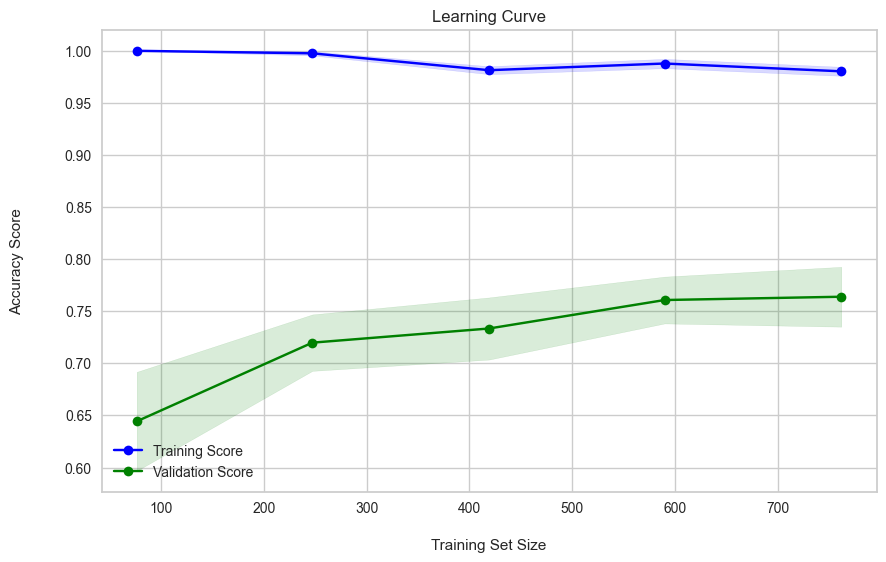

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(mlpT,
                                                        data_train,
                                                        target_train,
                                                        cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation Score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.title('Learning Curve')

# Ajustar la posición de las etiquetas de las funciones de la gráfica
plt.gca().xaxis.set_label_coords(0.5, -0.1)  # Ajustar la posición de la etiqueta del eje x
plt.gca().yaxis.set_label_coords(-0.1, 0.5)  # Ajustar la posición de la etiqueta del eje y
plt.gca().title.set_position([.5, 1.05])  # Ajustar la posición del título

plt.show()

## Tuneo de Parametros

In [31]:
parametros_tun  = param_grid = {
    'mlpclassifier__max_iter': (100,200,500,1000),
    'mlpclassifier__learning_rate_init': (0.01, 0.1, 1,10),
    'mlpclassifier__hidden_layer_sizes':((3,2),(5,3),(10,2))}
model_grid_search = GridSearchCV(mlpT, param_grid=parametros_tun,
                                 n_jobs=2, cv=10) #Vamos a usar dos procesadores(n_jobs), y 10 k-folds
model_grid_search.fit(data_train, target_train)

Iteration 1, loss = 15.67314464
Iteration 2, loss = 14.19271673
Iteration 3, loss = 11.96854511
Iteration 4, loss = 10.37287535
Iteration 5, loss = 10.92561182
Iteration 6, loss = 8.94085498
Iteration 7, loss = 6.58786519
Iteration 8, loss = 6.35003152
Iteration 9, loss = 5.31891693
Iteration 10, loss = 4.43042930
Iteration 11, loss = 2.96394141
Iteration 12, loss = 3.04910545
Iteration 13, loss = 2.79068735
Iteration 14, loss = 2.06910342
Iteration 15, loss = 2.02658699
Iteration 16, loss = 1.99504782
Iteration 17, loss = 1.19163738
Iteration 18, loss = 0.77270865
Iteration 19, loss = 0.65878431
Iteration 20, loss = 0.53162782
Iteration 21, loss = 0.42537139
Iteration 22, loss = 0.38983523
Iteration 23, loss = 0.41592437
Iteration 24, loss = 0.39685721
Iteration 25, loss = 0.32834594
Iteration 26, loss = 0.31770418
Iteration 27, loss = 0.32720198
Iteration 28, loss = 0.25474229
Iteration 29, loss = 0.25802940
Iteration 30, loss = 0.34772807
Iteration 31, loss = 0.32776793
Iteration 32

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('one_hot_encoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         []),
                                                                        ('standard_scaler',
                                                                         StandardScaler(),
                                                                         ['MSSubClass',
                                                                          'LotFrontage',
                                                                          'LotArea',
                                                                          'OverallQual',
                                                                          'OverallCond',
                                                                          'YearBuilt',
                                                                          'YearRemodAdd',
                                                                          'MasVnrArea',
                                                                          'BsmtFinSF1',
                                                                          'BsmtFinSF2',
                                                                          'BsmtUnfSF',
                                                                          'TotalBsmt...
                                                                          'GarageYrBlt',
                                                                          'GarageCars',
                                                                          'GarageArea',
                                                                          'WoodDeckSF',
                                                                          'OpenPorchSF',
                                                                          'EnclosedPorch', ...])])),
                                       ('mlpclassifier',
                                        MLPClassifier(activation='identity',
                                                      hidden_layer_sizes=(5, 3),
                                                      verbose=True))]),
             n_jobs=2,
             param_grid={'mlpclassifier__hidden_layer_sizes': ((3, 2), (5, 3),
                                                               (10, 2)),
                         'mlpclassifier__learning_rate_init': (0.01, 0.1, 1,
                                                               10),
                         'mlpclassifier__max_iter': (100, 200, 500, 1000)})

In [32]:
ypredMT = model_grid_search.predict(data_train)
cmTM = confusion_matrix(target_train,ypredMT)
accuracyTM = accuracy_score(target_train,ypredMT)
precisionTM = precision_score(target_train, ypredMT,average='micro')
recallTM = recall_score(target_train, ypredMT,average='micro')
f1TM = f1_score(target_train,ypredMT,average='micro')
print('Matriz de confusión\n',cmT)
print('Accuracy: ',accuracyT)
print('Precision: ', precisionT)
print('recall: ',recallT)

Matriz de confusión
 [[503   0   2]
 [  0 188  11]
 [  3  12 234]]
Accuracy:  0.9706190975865687
Precision:  0.9706190975865687
recall:  0.9706190975865687


In [33]:
ypredMT = model_grid_search.predict(data_test)
cmTM = confusion_matrix(target_test,ypredMT)
accuracyTM = accuracy_score(target_test,ypredMT)
precisionTM = precision_score(target_test, ypredMT,average='micro')
recallTM = recall_score(target_test, ypredMT,average='micro')
f1TM = f1_score(target_test,ypredMT,average='micro')
print('Matriz de confusión\n',cmT)
print('Accuracy: ',accuracyT)
print('Precision: ', precisionT)
print('recall: ',recallT)

Matriz de confusión
 [[503   0   2]
 [  0 188  11]
 [  3  12 234]]
Accuracy:  0.9706190975865687
Precision:  0.9706190975865687
recall:  0.9706190975865687


In [55]:
data_train, data_test,target_train, target_test = train_test_split(data, toRegresion,test_size=0.3,train_size=0.7)
data_train.columns
data_train = data_train.dropna()
target_train = target_train[data_train.index]  # Asegúrate de alinear los objetivos después de eliminar las filas
data_test = data_test.dropna()
target_test = target_test[data_test.index]  # Asegúrate de alinear los objetivos después de eliminar las filas

In [56]:
mlpT = MLPClassifier(activation="tanh",verbose=True,hidden_layer_sizes=(5,3))
mlpT.fit(data_train,target_train)
y_predT = mlpT.predict(data_test)
X_predT = mlpT.predict(data_train)
y_predT

Iteration 1, loss = 6.26103770
Iteration 2, loss = 6.25386386
Iteration 3, loss = 6.24885025
Iteration 4, loss = 6.24367880
Iteration 5, loss = 6.23874489
Iteration 6, loss = 6.23340969
Iteration 7, loss = 6.22840455
Iteration 8, loss = 6.22359213
Iteration 9, loss = 6.21908408
Iteration 10, loss = 6.21444377
Iteration 11, loss = 6.20980454
Iteration 12, loss = 6.20467408
Iteration 13, loss = 6.20000140
Iteration 14, loss = 6.19518803
Iteration 15, loss = 6.19039521
Iteration 16, loss = 6.18540308
Iteration 17, loss = 6.18072683
Iteration 18, loss = 6.17885306
Iteration 19, loss = 6.17677252
Iteration 20, loss = 6.17536560
Iteration 21, loss = 6.17343656
Iteration 22, loss = 6.16326622
Iteration 23, loss = 6.15641219
Iteration 24, loss = 6.15243227
Iteration 25, loss = 6.14955266
Iteration 26, loss = 6.14672615
Iteration 27, loss = 6.14208723
Iteration 28, loss = 6.13725655
Iteration 29, loss = 6.13313330
Iteration 30, loss = 6.12876590
Iteration 31, loss = 6.12477632
Iteration 32, los

c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


array([140000, 140000, 140000, 140000, 140000, 140000, 140000, 140000,
       140000, 140000, 140000, 140000, 140000, 140000, 140000, 140000,
       140000, 140000, 140000, 140000, 140000, 140000, 140000, 140000,
       140000, 140000, 140000, 140000, 140000, 140000, 140000, 140000,
       140000, 140000, 140000, 140000, 140000, 140000, 140000, 140000,
       140000, 140000, 140000, 140000, 140000, 140000, 140000, 140000,
       140000, 140000, 140000, 140000, 140000, 140000, 140000, 140000,
       140000, 140000, 140000, 140000, 140000, 140000, 140000, 140000,
       140000, 140000, 140000, 140000, 140000, 140000, 140000, 140000,
       140000, 140000, 140000, 140000, 140000, 140000, 140000, 140000,
       140000, 140000, 140000, 140000, 140000, 140000, 140000, 140000,
       140000, 140000, 140000, 140000, 140000, 140000, 140000, 140000,
       140000, 140000, 140000, 140000, 140000, 140000, 140000, 140000,
       140000, 140000, 140000, 140000, 140000, 140000, 140000, 140000,
      

In [57]:
print("-------------------- SVM regresion Model ------------------------------------")
print("Root Mean squared error: %.2f" % root_mean_squared_error(target_test, y_predT))
print("Mean squared error: %.2f" % mean_squared_error(target_test, y_predT))
print('R^2 score: %.2f' % r2_score(target_test, y_predT))


-------------------- SVM regresion Model ------------------------------------
Root Mean squared error: 89585.86
Mean squared error: 8025625693.52
R^2 score: -0.37


In [58]:
print("-------------------- SVM regresion Model ------------------------------------")
print("Root Mean squared error: %.2f" % root_mean_squared_error(target_train, X_predT))
print("Mean squared error: %.2f" % mean_squared_error(target_train, X_predT))
print('R^2 score: %.2f' % r2_score(target_train, X_predT))


-------------------- SVM regresion Model ------------------------------------
Root Mean squared error: 91444.57
Mean squared error: 8362108490.55
R^2 score: -0.31


## Modelo 2 RNA

In [59]:
mlpR = make_pipeline(preprocesador,MLPClassifier(activation="logistic",verbose=True,hidden_layer_sizes=(5,3)))
mlpR

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  []),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', ...])])),
                ('mlpclassifier',
                 MLPClassifier(activation='logistic', hidden_layer_sizes=(5, 3),
                               verbose=True))])

In [60]:
mlpR.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'columntransformer', 'mlpclassifier', 'columntransformer__n_jobs', 'columntransformer__remainder', 'columntransformer__sparse_threshold', 'columntransformer__transformer_weights', 'columntransformer__transformers', 'columntransformer__verbose', 'columntransformer__verbose_feature_names_out', 'columntransformer__one_hot_encoder', 'columntransformer__standard_scaler', 'columntransformer__one_hot_encoder__categories', 'columntransformer__one_hot_encoder__drop', 'columntransformer__one_hot_encoder__dtype', 'columntransformer__one_hot_encoder__feature_name_combiner', 'columntransformer__one_hot_encoder__handle_unknown', 'columntransformer__one_hot_encoder__max_categories', 'columntransformer__one_hot_encoder__min_frequency', 'columntransformer__one_hot_encoder__sparse_output', 'columntransformer__standard_scaler__copy', 'columntransformer__standard_scaler__with_mean', 'columntransformer__standard_scaler__with_std', 'mlpclassifier__activation', 'mlpcl

In [61]:
data_train, data_test, target_train, target_test = train_test_split(
    data, target, train_size=0.7,test_size=0.3)
print("Shape train",data_train.shape)
print("Shape test",data_test.shape)
data_train = data_train.dropna()
target_train = target_train[data_train.index]  # Asegúrate de alinear los objetivos después de eliminar las filas
data_test = data_test.dropna()
target_test = target_test[data_test.index]  # Asegúrate de alinear los objetivos después de eliminar las filas
data.isnull().sum()

Shape train (1021, 301)
Shape test (438, 301)


MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
                        ..
SaleCondition_Partial    0
SaleCondition_Family     0
SaleCondition_Alloca     0
SaleCondition_Abnorml    0
SaleCondition_AdjLand    0
Length: 301, dtype: int64

In [62]:
mlpR.fit(data_train,target_train)

Iteration 1, loss = 1.06361692
Iteration 2, loss = 1.05722118
Iteration 3, loss = 1.05122927
Iteration 4, loss = 1.04545904
Iteration 5, loss = 1.04006412
Iteration 6, loss = 1.03501662
Iteration 7, loss = 1.03056061
Iteration 8, loss = 1.02594917
Iteration 9, loss = 1.02194000
Iteration 10, loss = 1.01794593
Iteration 11, loss = 1.01423251
Iteration 12, loss = 1.01058978
Iteration 13, loss = 1.00711464
Iteration 14, loss = 1.00377925
Iteration 15, loss = 1.00041420
Iteration 16, loss = 0.99719154
Iteration 17, loss = 0.99393371
Iteration 18, loss = 0.99091822
Iteration 19, loss = 0.98782907
Iteration 20, loss = 0.98479541
Iteration 21, loss = 0.98172959
Iteration 22, loss = 0.97868622
Iteration 23, loss = 0.97563573
Iteration 24, loss = 0.97257055
Iteration 25, loss = 0.96959450
Iteration 26, loss = 0.96641637
Iteration 27, loss = 0.96321440
Iteration 28, loss = 0.96009270
Iteration 29, loss = 0.95679396
Iteration 30, loss = 0.95359572
Iteration 31, loss = 0.95024335
Iteration 32, los

c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  []),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', ...])])),
                ('mlpclassifier',
                 MLPClassifier(activation='logistic', hidden_layer_sizes=(5, 3),
                               verbose=True))])

In [63]:
ypredM = mlpR.predict(data_train)
cmT = confusion_matrix(target_train,ypredM)
accuracyT = accuracy_score(target_train,ypredM)
precisionT = precision_score(target_train, ypredM,average='micro')
recallT =  recall_score(target_train, ypredM,average='micro')
f1T = f1_score(target_train,ypredM,average='micro')
print('Matriz de confusión\n',cmT)
print('Accuracy: ',accuracyT)
print('Precision: ', precisionT)
print('recall: ',recallT)

Matriz de confusión
 [[496   0   4]
 [  0   0 208]
 [  8   0 243]]
Accuracy:  0.7705943691345151
Precision:  0.7705943691345151
recall:  0.7705943691345151


In [64]:
ypredM = mlpR.predict(data_test)
cmT = confusion_matrix(target_test,ypredM)
accuracyT = accuracy_score(target_test,ypredM)
precisionT = precision_score(target_test, ypredM,average='micro')
recallT =  recall_score(target_test, ypredM,average='micro')
f1T = f1_score(target_test,ypredM,average='micro')
print('Matriz de confusión\n',cmT)
print('Accuracy: ',accuracyT)
print('Precision: ', precisionT)
print('recall: ',recallT)

Matriz de confusión
 [[201   0  16]
 [  0   0  91]
 [ 25   1  78]]
Accuracy:  0.6771844660194175
Precision:  0.6771844660194175
recall:  0.6771844660194175


Iteration 1, loss = 0.97880630
Iteration 2, loss = 0.97590100
Iteration 3, loss = 0.97300082
Iteration 4, loss = 0.97010714
Iteration 5, loss = 0.96722141
Iteration 6, loss = 0.96434512
Iteration 7, loss = 0.96147977
Iteration 8, loss = 0.95862686
Iteration 9, loss = 0.95578784
Iteration 10, loss = 0.95296411
Iteration 11, loss = 0.95015700
Iteration 12, loss = 0.94736773
Iteration 13, loss = 0.94459740
Iteration 14, loss = 0.94184702
Iteration 15, loss = 0.93911747
Iteration 16, loss = 0.93640954
Iteration 17, loss = 0.93372388
Iteration 18, loss = 0.93106105
Iteration 19, loss = 0.92842149
Iteration 20, loss = 0.92580554
Iteration 21, loss = 0.92321344
Iteration 22, loss = 0.92064536
Iteration 23, loss = 0.91810136
Iteration 24, loss = 0.91558146
Iteration 25, loss = 0.91308561
Iteration 26, loss = 0.91061370
Iteration 27, loss = 0.90816559
Iteration 28, loss = 0.90574109
Iteration 29, loss = 0.90334000
Iteration 30, loss = 0.90096209
Iteration 31, loss = 0.89860712
Iteration 32, los

c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 33, loss = 0.97405254
Iteration 34, loss = 0.97286638
Iteration 35, loss = 0.97166953
Iteration 36, loss = 0.97044914
Iteration 37, loss = 0.96930372
Iteration 38, loss = 0.96813883
Iteration 39, loss = 0.96697089
Iteration 40, loss = 0.96579705
Iteration 41, loss = 0.96467524
Iteration 42, loss = 0.96355200
Iteration 43, loss = 0.96240446
Iteration 44, loss = 0.96127265
Iteration 45, loss = 0.96014492
Iteration 46, loss = 0.95910954
Iteration 47, loss = 0.95794525
Iteration 48, loss = 0.95694959
Iteration 49, loss = 0.95587456
Iteration 50, loss = 0.95486183
Iteration 51, loss = 0.95383659
Iteration 52, loss = 0.95286244
Iteration 53, loss = 0.95182705
Iteration 54, loss = 0.95083644
Iteration 55, loss = 0.94979168
Iteration 56, loss = 0.94876148
Iteration 57, loss = 0.94769149
Iteration 58, loss = 0.94668483
Iteration 59, loss = 0.94558192
Iteration 60, loss = 0.94454759
Iteration 61, loss = 0.94350839
Iteration 62, loss = 0.94242720
Iteration 63, loss = 0.94140595
Iteratio

c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 92, loss = 0.80544257
Iteration 93, loss = 0.80315519
Iteration 94, loss = 0.80093911
Iteration 95, loss = 0.79864827
Iteration 96, loss = 0.79643370
Iteration 97, loss = 0.79422432
Iteration 98, loss = 0.79199265
Iteration 99, loss = 0.78980801
Iteration 100, loss = 0.78758171
Iteration 101, loss = 0.78535421
Iteration 102, loss = 0.78313472
Iteration 103, loss = 0.78090277
Iteration 104, loss = 0.77872349
Iteration 105, loss = 0.77650109
Iteration 106, loss = 0.77428785
Iteration 107, loss = 0.77211172
Iteration 108, loss = 0.76993621
Iteration 109, loss = 0.76776263
Iteration 110, loss = 0.76556574
Iteration 111, loss = 0.76337610
Iteration 112, loss = 0.76116432
Iteration 113, loss = 0.75900836
Iteration 114, loss = 0.75682546
Iteration 115, loss = 0.75466478
Iteration 116, loss = 0.75248059
Iteration 117, loss = 0.75041198
Iteration 118, loss = 0.74826511
Iteration 119, loss = 0.74617565
Iteration 120, loss = 0.74406120
Iteration 121, loss = 0.74196636
Iteration 122, los

c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 95, loss = 0.78427936
Iteration 96, loss = 0.78088320
Iteration 97, loss = 0.77756626
Iteration 98, loss = 0.77416842
Iteration 99, loss = 0.77084989
Iteration 100, loss = 0.76750112
Iteration 101, loss = 0.76419207
Iteration 102, loss = 0.76088972
Iteration 103, loss = 0.75760341
Iteration 104, loss = 0.75430894
Iteration 105, loss = 0.75104563
Iteration 106, loss = 0.74778239
Iteration 107, loss = 0.74456370
Iteration 108, loss = 0.74133457
Iteration 109, loss = 0.73811532
Iteration 110, loss = 0.73493016
Iteration 111, loss = 0.73177031
Iteration 112, loss = 0.72863973
Iteration 113, loss = 0.72551821
Iteration 114, loss = 0.72242797
Iteration 115, loss = 0.71930730
Iteration 116, loss = 0.71629295
Iteration 117, loss = 0.71326849
Iteration 118, loss = 0.71024883
Iteration 119, loss = 0.70726018
Iteration 120, loss = 0.70430320
Iteration 121, loss = 0.70135827
Iteration 122, loss = 0.69844645
Iteration 123, loss = 0.69556962
Iteration 124, loss = 0.69269272
Iteration 125, 

c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 49, loss = 0.90644452
Iteration 50, loss = 0.90194118
Iteration 51, loss = 0.89741840
Iteration 52, loss = 0.89281544
Iteration 53, loss = 0.88815947
Iteration 54, loss = 0.88349807
Iteration 55, loss = 0.87878834
Iteration 56, loss = 0.87402381
Iteration 57, loss = 0.86923276
Iteration 58, loss = 0.86445916
Iteration 59, loss = 0.85957746
Iteration 60, loss = 0.85475591
Iteration 61, loss = 0.84993272
Iteration 62, loss = 0.84501851
Iteration 63, loss = 0.84018040
Iteration 64, loss = 0.83529825
Iteration 65, loss = 0.83045478
Iteration 66, loss = 0.82557243
Iteration 67, loss = 0.82072411
Iteration 68, loss = 0.81587760
Iteration 69, loss = 0.81103600
Iteration 70, loss = 0.80623757
Iteration 71, loss = 0.80140073
Iteration 72, loss = 0.79661253
Iteration 73, loss = 0.79190631
Iteration 74, loss = 0.78714425
Iteration 75, loss = 0.78239783
Iteration 76, loss = 0.77772390
Iteration 77, loss = 0.77308927
Iteration 78, loss = 0.76842101
Iteration 79, loss = 0.76380917
Iteratio

c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 68, loss = 0.94244579
Iteration 69, loss = 0.94089703
Iteration 70, loss = 0.93931165
Iteration 71, loss = 0.93774705
Iteration 72, loss = 0.93626650
Iteration 73, loss = 0.93469118
Iteration 74, loss = 0.93320883
Iteration 75, loss = 0.93172579
Iteration 76, loss = 0.93021016
Iteration 77, loss = 0.92881018
Iteration 78, loss = 0.92734388
Iteration 79, loss = 0.92588709
Iteration 80, loss = 0.92445245
Iteration 81, loss = 0.92302770
Iteration 82, loss = 0.92162185
Iteration 83, loss = 0.92023329
Iteration 84, loss = 0.91877161
Iteration 85, loss = 0.91738499
Iteration 86, loss = 0.91596573
Iteration 87, loss = 0.91453497
Iteration 88, loss = 0.91317879
Iteration 89, loss = 0.91172164
Iteration 90, loss = 0.91038230
Iteration 91, loss = 0.90896300
Iteration 92, loss = 0.90756816
Iteration 93, loss = 0.90622176
Iteration 94, loss = 0.90479303
Iteration 95, loss = 0.90345854
Iteration 96, loss = 0.90212100
Iteration 97, loss = 0.90069535
Iteration 98, loss = 0.89937692
Iteratio

c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 28, loss = 0.97918053
Iteration 29, loss = 0.97816043
Iteration 30, loss = 0.97719141
Iteration 31, loss = 0.97617594
Iteration 32, loss = 0.97514604
Iteration 33, loss = 0.97408159
Iteration 34, loss = 0.97303706
Iteration 35, loss = 0.97193588
Iteration 36, loss = 0.97082271
Iteration 37, loss = 0.96964756
Iteration 38, loss = 0.96846786
Iteration 39, loss = 0.96723817
Iteration 40, loss = 0.96604560
Iteration 41, loss = 0.96479373
Iteration 42, loss = 0.96351518
Iteration 43, loss = 0.96221329
Iteration 44, loss = 0.96089496
Iteration 45, loss = 0.95957292
Iteration 46, loss = 0.95819646
Iteration 47, loss = 0.95674771
Iteration 48, loss = 0.95529110
Iteration 49, loss = 0.95381248
Iteration 50, loss = 0.95229693
Iteration 51, loss = 0.95079764
Iteration 52, loss = 0.94925430
Iteration 53, loss = 0.94767658
Iteration 54, loss = 0.94608761
Iteration 55, loss = 0.94450009
Iteration 56, loss = 0.94284435
Iteration 57, loss = 0.94114482
Iteration 58, loss = 0.93939131
Iteratio

c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 71, loss = 0.93176603
Iteration 72, loss = 0.92982989
Iteration 73, loss = 0.92786736
Iteration 74, loss = 0.92588942
Iteration 75, loss = 0.92391514
Iteration 76, loss = 0.92190532
Iteration 77, loss = 0.91989015
Iteration 78, loss = 0.91789239
Iteration 79, loss = 0.91581141
Iteration 80, loss = 0.91379800
Iteration 81, loss = 0.91166986
Iteration 82, loss = 0.90960939
Iteration 83, loss = 0.90749623
Iteration 84, loss = 0.90536563
Iteration 85, loss = 0.90324878
Iteration 86, loss = 0.90114006
Iteration 87, loss = 0.89898668
Iteration 88, loss = 0.89681921
Iteration 89, loss = 0.89469188
Iteration 90, loss = 0.89248299
Iteration 91, loss = 0.89031757
Iteration 92, loss = 0.88811262
Iteration 93, loss = 0.88590898
Iteration 94, loss = 0.88369934
Iteration 95, loss = 0.88145642
Iteration 96, loss = 0.87922083
Iteration 97, loss = 0.87698059
Iteration 98, loss = 0.87474345
Iteration 99, loss = 0.87245513
Iteration 100, loss = 0.87021768
Iteration 101, loss = 0.86797707
Iterat

c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 64, loss = 0.96163411
Iteration 65, loss = 0.95936374
Iteration 66, loss = 0.95707896
Iteration 67, loss = 0.95482836
Iteration 68, loss = 0.95254789
Iteration 69, loss = 0.95024117
Iteration 70, loss = 0.94791556
Iteration 71, loss = 0.94561295
Iteration 72, loss = 0.94327587
Iteration 73, loss = 0.94090110
Iteration 74, loss = 0.93853203
Iteration 75, loss = 0.93613009
Iteration 76, loss = 0.93379622
Iteration 77, loss = 0.93132053
Iteration 78, loss = 0.92891853
Iteration 79, loss = 0.92641488
Iteration 80, loss = 0.92395022
Iteration 81, loss = 0.92140700
Iteration 82, loss = 0.91890762
Iteration 83, loss = 0.91632421
Iteration 84, loss = 0.91377536
Iteration 85, loss = 0.91114122
Iteration 86, loss = 0.90854230
Iteration 87, loss = 0.90589187
Iteration 88, loss = 0.90316160
Iteration 89, loss = 0.90045085
Iteration 90, loss = 0.89772829
Iteration 91, loss = 0.89496978
Iteration 92, loss = 0.89219342
Iteration 93, loss = 0.88932632
Iteration 94, loss = 0.88647882
Iteratio

c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.97485819
Iteration 2, loss = 0.97337641
Iteration 3, loss = 0.97200577
Iteration 4, loss = 0.97065689
Iteration 5, loss = 0.96935031
Iteration 6, loss = 0.96804844
Iteration 7, loss = 0.96679445
Iteration 8, loss = 0.96552862
Iteration 9, loss = 0.96428869
Iteration 10, loss = 0.96308718
Iteration 11, loss = 0.96190074
Iteration 12, loss = 0.96070696
Iteration 13, loss = 0.95956465
Iteration 14, loss = 0.95845252
Iteration 15, loss = 0.95731864
Iteration 16, loss = 0.95623099
Iteration 17, loss = 0.95514220
Iteration 18, loss = 0.95408787
Iteration 19, loss = 0.95304836
Iteration 20, loss = 0.95200287
Iteration 21, loss = 0.95101496
Iteration 22, loss = 0.94999433
Iteration 23, loss = 0.94902917
Iteration 24, loss = 0.94805507
Iteration 25, loss = 0.94707497
Iteration 26, loss = 0.94611751
Iteration 27, loss = 0.94519630
Iteration 28, loss = 0.94427829
Iteration 29, loss = 0.94336164
Iteration 30, loss = 0.94244620
Iteration 31, loss = 0.94151764
Iteration 32, los

c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 105, loss = 0.86865380
Iteration 106, loss = 0.86680823
Iteration 107, loss = 0.86498371
Iteration 108, loss = 0.86306320
Iteration 109, loss = 0.86120166
Iteration 110, loss = 0.85932562
Iteration 111, loss = 0.85738728
Iteration 112, loss = 0.85548524
Iteration 113, loss = 0.85358061
Iteration 114, loss = 0.85167969
Iteration 115, loss = 0.84975861
Iteration 116, loss = 0.84779038
Iteration 117, loss = 0.84588667
Iteration 118, loss = 0.84394651
Iteration 119, loss = 0.84199073
Iteration 120, loss = 0.84002222
Iteration 121, loss = 0.83804653
Iteration 122, loss = 0.83610131
Iteration 123, loss = 0.83409779
Iteration 124, loss = 0.83214564
Iteration 125, loss = 0.83014923
Iteration 126, loss = 0.82821778
Iteration 127, loss = 0.82629226
Iteration 128, loss = 0.82433508
Iteration 129, loss = 0.82238571
Iteration 130, loss = 0.82044604
Iteration 131, loss = 0.81846883
Iteration 132, loss = 0.81644902
Iteration 133, loss = 0.81445763
Iteration 134, loss = 0.81245632
Iteration 

c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 45, loss = 1.28406911
Iteration 46, loss = 1.28069082
Iteration 47, loss = 1.27742667
Iteration 48, loss = 1.27406655
Iteration 49, loss = 1.27093779
Iteration 50, loss = 1.26773869
Iteration 51, loss = 1.26471484
Iteration 52, loss = 1.26152703
Iteration 53, loss = 1.25851028
Iteration 54, loss = 1.25548140
Iteration 55, loss = 1.25262540
Iteration 56, loss = 1.24968788
Iteration 57, loss = 1.24674218
Iteration 58, loss = 1.24397446
Iteration 59, loss = 1.24119895
Iteration 60, loss = 1.23832710
Iteration 61, loss = 1.23561055
Iteration 62, loss = 1.23290731
Iteration 63, loss = 1.23021426
Iteration 64, loss = 1.22758532
Iteration 65, loss = 1.22499761
Iteration 66, loss = 1.22230969
Iteration 67, loss = 1.21974987
Iteration 68, loss = 1.21716715
Iteration 69, loss = 1.21470494
Iteration 70, loss = 1.21215665
Iteration 71, loss = 1.20959868
Iteration 72, loss = 1.20717548
Iteration 73, loss = 1.20476829
Iteration 74, loss = 1.20223035
Iteration 75, loss = 1.19980131
Iteratio

c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 27, loss = 0.97196556
Iteration 28, loss = 0.96941145
Iteration 29, loss = 0.96640941
Iteration 30, loss = 0.96394973
Iteration 31, loss = 0.96125541
Iteration 32, loss = 0.95863016
Iteration 33, loss = 0.95614010
Iteration 34, loss = 0.95351271
Iteration 35, loss = 0.95099895
Iteration 36, loss = 0.94860191
Iteration 37, loss = 0.94625864
Iteration 38, loss = 0.94374094
Iteration 39, loss = 0.94130411
Iteration 40, loss = 0.93894831
Iteration 41, loss = 0.93649988
Iteration 42, loss = 0.93408714
Iteration 43, loss = 0.93173517
Iteration 44, loss = 0.92927822
Iteration 45, loss = 0.92687160
Iteration 46, loss = 0.92447573
Iteration 47, loss = 0.92204793
Iteration 48, loss = 0.91960817
Iteration 49, loss = 0.91717338
Iteration 50, loss = 0.91470816
Iteration 51, loss = 0.91224309
Iteration 52, loss = 0.90979047
Iteration 53, loss = 0.90725633
Iteration 54, loss = 0.90474983
Iteration 55, loss = 0.90224095
Iteration 56, loss = 0.89973590
Iteration 57, loss = 0.89719865
Iteratio

c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 84, loss = 0.91684319
Iteration 85, loss = 0.91492594
Iteration 86, loss = 0.91298358
Iteration 87, loss = 0.91096547
Iteration 88, loss = 0.90905298
Iteration 89, loss = 0.90713965
Iteration 90, loss = 0.90516476
Iteration 91, loss = 0.90324792
Iteration 92, loss = 0.90139848
Iteration 93, loss = 0.89949560
Iteration 94, loss = 0.89756842
Iteration 95, loss = 0.89581590
Iteration 96, loss = 0.89387080
Iteration 97, loss = 0.89198940
Iteration 98, loss = 0.89019052
Iteration 99, loss = 0.88831593
Iteration 100, loss = 0.88640896
Iteration 101, loss = 0.88455076
Iteration 102, loss = 0.88280813
Iteration 103, loss = 0.88085127
Iteration 104, loss = 0.87902090
Iteration 105, loss = 0.87726486
Iteration 106, loss = 0.87536976
Iteration 107, loss = 0.87357843
Iteration 108, loss = 0.87181885
Iteration 109, loss = 0.86997260
Iteration 110, loss = 0.86816439
Iteration 111, loss = 0.86643982
Iteration 112, loss = 0.86463977
Iteration 113, loss = 0.86286213
Iteration 114, loss = 0.86

c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 45, loss = 1.03658864
Iteration 46, loss = 1.03353181
Iteration 47, loss = 1.03048817
Iteration 48, loss = 1.02738377
Iteration 49, loss = 1.02438295
Iteration 50, loss = 1.02150944
Iteration 51, loss = 1.01867671
Iteration 52, loss = 1.01591330
Iteration 53, loss = 1.01305408
Iteration 54, loss = 1.01026646
Iteration 55, loss = 1.00748932
Iteration 56, loss = 1.00470004
Iteration 57, loss = 1.00197020
Iteration 58, loss = 0.99933164
Iteration 59, loss = 0.99662551
Iteration 60, loss = 0.99390775
Iteration 61, loss = 0.99120109
Iteration 62, loss = 0.98858314
Iteration 63, loss = 0.98576685
Iteration 64, loss = 0.98319862
Iteration 65, loss = 0.98060409
Iteration 66, loss = 0.97798308
Iteration 67, loss = 0.97547061
Iteration 68, loss = 0.97284782
Iteration 69, loss = 0.97038147
Iteration 70, loss = 0.96794586
Iteration 71, loss = 0.96543561
Iteration 72, loss = 0.96306396
Iteration 73, loss = 0.96068094
Iteration 74, loss = 0.95827300
Iteration 75, loss = 0.95596382
Iteratio

c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 82, loss = 0.95778153
Iteration 83, loss = 0.95536098
Iteration 84, loss = 0.95291465
Iteration 85, loss = 0.95047378
Iteration 86, loss = 0.94818893
Iteration 87, loss = 0.94570766
Iteration 88, loss = 0.94334186
Iteration 89, loss = 0.94110942
Iteration 90, loss = 0.93875793
Iteration 91, loss = 0.93657484
Iteration 92, loss = 0.93434380
Iteration 93, loss = 0.93216842
Iteration 94, loss = 0.92992163
Iteration 95, loss = 0.92777113
Iteration 96, loss = 0.92567706
Iteration 97, loss = 0.92359197
Iteration 98, loss = 0.92144392
Iteration 99, loss = 0.91945613
Iteration 100, loss = 0.91743567
Iteration 101, loss = 0.91532388
Iteration 102, loss = 0.91332096
Iteration 103, loss = 0.91135669
Iteration 104, loss = 0.90945352
Iteration 105, loss = 0.90745324
Iteration 106, loss = 0.90556870
Iteration 107, loss = 0.90364615
Iteration 108, loss = 0.90175769
Iteration 109, loss = 0.89990467
Iteration 110, loss = 0.89803130
Iteration 111, loss = 0.89623772
Iteration 112, loss = 0.8944

c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 73, loss = 0.88430647
Iteration 74, loss = 0.88180719
Iteration 75, loss = 0.87938200
Iteration 76, loss = 0.87689490
Iteration 77, loss = 0.87437688
Iteration 78, loss = 0.87192108
Iteration 79, loss = 0.86941039
Iteration 80, loss = 0.86697210
Iteration 81, loss = 0.86444936
Iteration 82, loss = 0.86202255
Iteration 83, loss = 0.85951754
Iteration 84, loss = 0.85701800
Iteration 85, loss = 0.85456465
Iteration 86, loss = 0.85204616
Iteration 87, loss = 0.84954506
Iteration 88, loss = 0.84700810
Iteration 89, loss = 0.84456467
Iteration 90, loss = 0.84197602
Iteration 91, loss = 0.83948193
Iteration 92, loss = 0.83692323
Iteration 93, loss = 0.83439583
Iteration 94, loss = 0.83185950
Iteration 95, loss = 0.82928963
Iteration 96, loss = 0.82669017
Iteration 97, loss = 0.82413126
Iteration 98, loss = 0.82152866
Iteration 99, loss = 0.81896806
Iteration 100, loss = 0.81630807
Iteration 101, loss = 0.81371198
Iteration 102, loss = 0.81109776
Iteration 103, loss = 0.80846338
Iter

c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.13586202
Iteration 2, loss = 1.13033583
Iteration 3, loss = 1.12484584
Iteration 4, loss = 1.11949130
Iteration 5, loss = 1.11416203
Iteration 6, loss = 1.10894179
Iteration 7, loss = 1.10357438
Iteration 8, loss = 1.09838426
Iteration 9, loss = 1.09338481
Iteration 10, loss = 1.08825418
Iteration 11, loss = 1.08319895
Iteration 12, loss = 1.07830328
Iteration 13, loss = 1.07348729
Iteration 14, loss = 1.06885732
Iteration 15, loss = 1.06404603
Iteration 16, loss = 1.05961481
Iteration 17, loss = 1.05526296
Iteration 18, loss = 1.05080874
Iteration 19, loss = 1.04671709
Iteration 20, loss = 1.04252839
Iteration 21, loss = 1.03851361
Iteration 22, loss = 1.03459655
Iteration 23, loss = 1.03063418
Iteration 24, loss = 1.02690961
Iteration 25, loss = 1.02306708
Iteration 26, loss = 1.01937905
Iteration 27, loss = 1.01584957
Iteration 28, loss = 1.01229409
Iteration 29, loss = 1.00866098
Iteration 30, loss = 1.00530557
Iteration 31, loss = 1.00190988
Iteration 32, los

c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.04187349
Iteration 2, loss = 1.03706777
Iteration 3, loss = 1.03264271
Iteration 4, loss = 1.02861712
Iteration 5, loss = 1.02463833
Iteration 6, loss = 1.02100782
Iteration 7, loss = 1.01750528
Iteration 8, loss = 1.01418842
Iteration 9, loss = 1.01102117
Iteration 10, loss = 1.00819454
Iteration 11, loss = 1.00554472
Iteration 12, loss = 1.00288240
Iteration 13, loss = 1.00044309
Iteration 14, loss = 0.99830259
Iteration 15, loss = 0.99609297
Iteration 16, loss = 0.99401640
Iteration 17, loss = 0.99203947
Iteration 18, loss = 0.99001368
Iteration 19, loss = 0.98822962
Iteration 20, loss = 0.98634121
Iteration 21, loss = 0.98449041
Iteration 22, loss = 0.98279309
Iteration 23, loss = 0.98112823
Iteration 24, loss = 0.97964870
Iteration 25, loss = 0.97822936
Iteration 26, loss = 0.97678389
Iteration 27, loss = 0.97539758
Iteration 28, loss = 0.97397861
Iteration 29, loss = 0.97246592
Iteration 30, loss = 0.97098101
Iteration 31, loss = 0.96948305
Iteration 32, los

c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 43, loss = 1.01108320
Iteration 44, loss = 1.00923979
Iteration 45, loss = 1.00735051
Iteration 46, loss = 1.00557869
Iteration 47, loss = 1.00375522
Iteration 48, loss = 1.00193862
Iteration 49, loss = 1.00014235
Iteration 50, loss = 0.99837307
Iteration 51, loss = 0.99654258
Iteration 52, loss = 0.99473326
Iteration 53, loss = 0.99298495
Iteration 54, loss = 0.99113832
Iteration 55, loss = 0.98932388
Iteration 56, loss = 0.98753377
Iteration 57, loss = 0.98570722
Iteration 58, loss = 0.98385837
Iteration 59, loss = 0.98202014
Iteration 60, loss = 0.98015152
Iteration 61, loss = 0.97821932
Iteration 62, loss = 0.97634478
Iteration 63, loss = 0.97446921
Iteration 64, loss = 0.97252655
Iteration 65, loss = 0.97057301
Iteration 66, loss = 0.96855783
Iteration 67, loss = 0.96655962
Iteration 68, loss = 0.96453356
Iteration 69, loss = 0.96251473
Iteration 70, loss = 0.96040030
Iteration 71, loss = 0.95827107
Iteration 72, loss = 0.95615823
Iteration 73, loss = 0.95396054
Iteratio

c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 39, loss = 0.96355600
Iteration 40, loss = 0.95951954
Iteration 41, loss = 0.95550439
Iteration 42, loss = 0.95163212
Iteration 43, loss = 0.94759913
Iteration 44, loss = 0.94376988
Iteration 45, loss = 0.93987599
Iteration 46, loss = 0.93606177
Iteration 47, loss = 0.93202128
Iteration 48, loss = 0.92821983
Iteration 49, loss = 0.92435439
Iteration 50, loss = 0.92059977
Iteration 51, loss = 0.91671001
Iteration 52, loss = 0.91294693
Iteration 53, loss = 0.90912339
Iteration 54, loss = 0.90536308
Iteration 55, loss = 0.90153600
Iteration 56, loss = 0.89784037
Iteration 57, loss = 0.89401820
Iteration 58, loss = 0.89026323
Iteration 59, loss = 0.88653190
Iteration 60, loss = 0.88277746
Iteration 61, loss = 0.87913589
Iteration 62, loss = 0.87534856
Iteration 63, loss = 0.87164897
Iteration 64, loss = 0.86794059
Iteration 65, loss = 0.86418564
Iteration 66, loss = 0.86047481
Iteration 67, loss = 0.85673359
Iteration 68, loss = 0.85307362
Iteration 69, loss = 0.84928731
Iteratio

c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


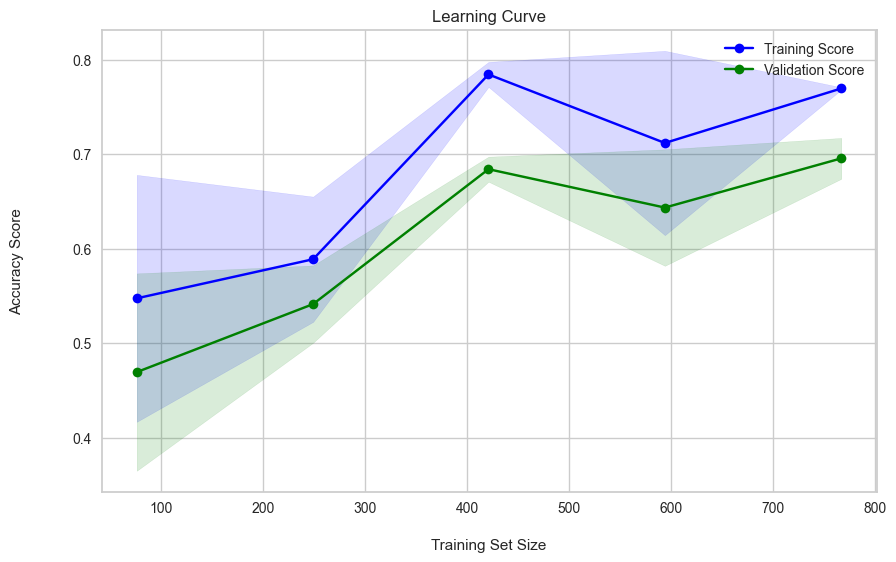

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(mlpR,
                                                        data_train,
                                                        target_train,
                                                        cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation Score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.title('Learning Curve')

# Ajustar la posición de las etiquetas de las funciones de la gráfica
plt.gca().xaxis.set_label_coords(0.5, -0.1)  # Ajustar la posición de la etiqueta del eje x
plt.gca().yaxis.set_label_coords(-0.1, 0.5)  # Ajustar la posición de la etiqueta del eje y
plt.gca().title.set_position([.5, 1.05])  # Ajustar la posición del título

plt.show()

## Tuneo de Parametros

In [66]:
parametros_tun  = param_grid = {
    'mlpclassifier__max_iter': (100,200,500,1000),
    'mlpclassifier__learning_rate_init': (0.01, 0.1, 1,10),
    'mlpclassifier__hidden_layer_sizes':((3,2),(5,3),(10,2))}
model_grid_search = GridSearchCV(mlpR, param_grid=parametros_tun,
                                 n_jobs=2, cv=10) #Vamos a usar dos procesadores(n_jobs), y 10 k-folds
model_grid_search.fit(data_train, target_train)

Iteration 1, loss = 1.24652472
Iteration 2, loss = 1.12201493
Iteration 3, loss = 1.04264060
Iteration 4, loss = 0.98334879
Iteration 5, loss = 0.93397370
Iteration 6, loss = 0.89323527
Iteration 7, loss = 0.85766318
Iteration 8, loss = 0.82531618
Iteration 9, loss = 0.79609359
Iteration 10, loss = 0.76862284
Iteration 11, loss = 0.74258880
Iteration 12, loss = 0.71776523
Iteration 13, loss = 0.69424633
Iteration 14, loss = 0.67169165
Iteration 15, loss = 0.64976870
Iteration 16, loss = 0.62860899
Iteration 17, loss = 0.60869268
Iteration 18, loss = 0.59052776
Iteration 19, loss = 0.57258649
Iteration 20, loss = 0.55695456
Iteration 21, loss = 0.54253301
Iteration 22, loss = 0.52981257
Iteration 23, loss = 0.51779505
Iteration 24, loss = 0.50714258
Iteration 25, loss = 0.49787494
Iteration 26, loss = 0.48943037
Iteration 27, loss = 0.48200575
Iteration 28, loss = 0.47512094
Iteration 29, loss = 0.46921220
Iteration 30, loss = 0.46351409
Iteration 31, loss = 0.45870208
Iteration 32, los

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('one_hot_encoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         []),
                                                                        ('standard_scaler',
                                                                         StandardScaler(),
                                                                         ['MSSubClass',
                                                                          'LotFrontage',
                                                                          'LotArea',
                                                                          'OverallQual',
                                                                          'OverallCond',
                                                                          'YearBuilt',
                                                                          'YearRemodAdd',
                                                                          'MasVnrArea',
                                                                          'BsmtFinSF1',
                                                                          'BsmtFinSF2',
                                                                          'BsmtUnfSF',
                                                                          'TotalBsmt...
                                                                          'GarageYrBlt',
                                                                          'GarageCars',
                                                                          'GarageArea',
                                                                          'WoodDeckSF',
                                                                          'OpenPorchSF',
                                                                          'EnclosedPorch', ...])])),
                                       ('mlpclassifier',
                                        MLPClassifier(activation='logistic',
                                                      hidden_layer_sizes=(5, 3),
                                                      verbose=True))]),
             n_jobs=2,
             param_grid={'mlpclassifier__hidden_layer_sizes': ((3, 2), (5, 3),
                                                               (10, 2)),
                         'mlpclassifier__learning_rate_init': (0.01, 0.1, 1,
                                                               10),
                         'mlpclassifier__max_iter': (100, 200, 500, 1000)})

In [67]:
ypredMT = model_grid_search.predict(data_train)
cmTM = confusion_matrix(target_train,ypredMT)
accuracyTM = accuracy_score(target_train,ypredMT)
precisionTM = precision_score(target_train, ypredMT,average='micro')
recallTM = recall_score(target_train, ypredMT,average='micro')
f1TM = f1_score(target_train,ypredMT,average='micro')
print('Matriz de confusión\n',cmT)
print('Accuracy: ',accuracyT)
print('Precision: ', precisionT)
print('recall: ',recallT)

Matriz de confusión
 [[201   0  16]
 [  0   0  91]
 [ 25   1  78]]
Accuracy:  0.6771844660194175
Precision:  0.6771844660194175
recall:  0.6771844660194175


In [68]:
ypredMT = model_grid_search.predict(data_test)
cmTM = confusion_matrix(target_test,ypredMT)
accuracyTM = accuracy_score(target_test,ypredMT)
precisionTM = precision_score(target_test, ypredMT,average='micro')
recallTM = recall_score(target_test, ypredMT,average='micro')
f1TM = f1_score(target_test,ypredMT,average='micro')
print('Matriz de confusión\n',cmT)
print('Accuracy: ',accuracyT)
print('Precision: ', precisionT)
print('recall: ',recallT)

Matriz de confusión
 [[201   0  16]
 [  0   0  91]
 [ 25   1  78]]
Accuracy:  0.6771844660194175
Precision:  0.6771844660194175
recall:  0.6771844660194175


In [69]:
data_train, data_test,target_train, target_test = train_test_split(data, toRegresion,test_size=0.3,train_size=0.7)
data_train.columns
data_train = data_train.dropna()
target_train = target_train[data_train.index]  # Asegúrate de alinear los objetivos después de eliminar las filas
data_test = data_test.dropna()
target_test = target_test[data_test.index]  # Asegúrate de alinear los objetivos después de eliminar las filas

In [70]:
mlpR = MLPClassifier(activation="logistic",verbose=True,hidden_layer_sizes=(5,3))
mlpR.fit(data_train,target_train)
y_predR = mlpR.predict(data_test)
X_predR = mlpR.predict(data_train)
y_predR

Iteration 1, loss = 6.24631418
Iteration 2, loss = 6.24223295
Iteration 3, loss = 6.23901241
Iteration 4, loss = 6.23585652
Iteration 5, loss = 6.23271737
Iteration 6, loss = 6.22955934
Iteration 7, loss = 6.22634926
Iteration 8, loss = 6.22322483
Iteration 9, loss = 6.21998319
Iteration 10, loss = 6.21675885
Iteration 11, loss = 6.21350030
Iteration 12, loss = 6.21005029
Iteration 13, loss = 6.20678586
Iteration 14, loss = 6.20337072
Iteration 15, loss = 6.19999932
Iteration 16, loss = 6.19655094
Iteration 17, loss = 6.19299586
Iteration 18, loss = 6.18956880
Iteration 19, loss = 6.18591370
Iteration 20, loss = 6.18249287
Iteration 21, loss = 6.17868769
Iteration 22, loss = 6.17483174
Iteration 23, loss = 6.16961845
Iteration 24, loss = 6.16517850
Iteration 25, loss = 6.16118035
Iteration 26, loss = 6.15710267
Iteration 27, loss = 6.15309152
Iteration 28, loss = 6.14913765
Iteration 29, loss = 6.14493423
Iteration 30, loss = 6.14104395
Iteration 31, loss = 6.13694801
Iteration 32, los

array([140000, 140000, 140000, 140000, 140000, 140000, 140000, 140000,
       140000, 140000, 140000, 140000, 140000, 140000, 140000, 140000,
       140000, 140000, 140000, 140000, 140000, 140000, 140000, 140000,
       140000, 140000, 140000, 140000, 140000, 140000, 140000, 140000,
       140000, 140000, 140000, 140000, 140000, 140000, 140000, 140000,
       140000, 140000, 140000, 140000, 140000, 140000, 140000, 140000,
       140000, 140000, 140000, 140000, 140000, 140000, 140000, 140000,
       140000, 140000, 140000, 140000, 140000, 140000, 140000, 140000,
       140000, 140000, 140000, 140000, 140000, 140000, 140000, 140000,
       140000, 140000, 140000, 140000, 140000, 140000, 140000, 140000,
       140000, 140000, 140000, 140000, 140000, 140000, 140000, 140000,
       140000, 140000, 140000, 140000, 140000, 140000, 140000, 140000,
       140000, 140000, 140000, 140000, 140000, 140000, 140000, 140000,
       140000, 140000, 140000, 140000, 140000, 140000, 140000, 140000,
      

In [71]:
print("-------------------- SVM regresion Model ------------------------------------")
print("Root Mean squared error: %.2f" % root_mean_squared_error(target_test, y_predR))
print("Mean squared error: %.2f" % mean_squared_error(target_test, y_predR))
print('R^2 score: %.2f' % r2_score(target_test, y_predR))


-------------------- SVM regresion Model ------------------------------------
Root Mean squared error: 86306.50
Mean squared error: 7448811300.85
R^2 score: -0.32


In [72]:
print("-------------------- SVM regresion Model ------------------------------------")
print("Root Mean squared error: %.2f" % root_mean_squared_error(target_train, X_predR))
print("Mean squared error: %.2f" % mean_squared_error(target_train, X_predR))
print('R^2 score: %.2f' % r2_score(target_train, X_predR))


-------------------- SVM regresion Model ------------------------------------
Root Mean squared error: 92804.80
Mean squared error: 8612730106.17
R^2 score: -0.33


In [73]:
print("-------------------- SVM regresion Model ------------------------------------")
print("Root Mean squared error: %.2f" % root_mean_squared_error(target_test, y_predR))
print("Mean squared error: %.2f" % mean_squared_error(target_test, y_predR))
print('R^2 score: %.2f' % r2_score(target_test, y_predR))


-------------------- SVM regresion Model ------------------------------------
Root Mean squared error: 86306.50
Mean squared error: 7448811300.85
R^2 score: -0.32


In [74]:
print("-------------------- SVM regresion Model ------------------------------------")
print("Root Mean squared error: %.2f" % root_mean_squared_error(target_train, X_predR))
print("Mean squared error: %.2f" % mean_squared_error(target_train, X_predR))
print('R^2 score: %.2f' % r2_score(target_train, X_predR))


-------------------- SVM regresion Model ------------------------------------
Root Mean squared error: 92804.80
Mean squared error: 8612730106.17
R^2 score: -0.33
